# Olist_Capstone_project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import KFold,GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import recall_score, accuracy_score, precision_score, confusion_matrix,classification_report
from sklearn.metrics import f1_score, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve, cohen_kappa_score
plt.rcParams['figure.figsize'] = [15,12]

In [2]:
location=pd.read_csv("olist_geolocation_dataset.csv")

In [3]:
order_items=pd.read_csv("olist_order_items_dataset.csv")

In [4]:
payments=pd.read_csv("olist_order_payments_dataset.csv")

In [5]:
customers=pd.read_csv('olist_customers_dataset.csv')

In [6]:
review=pd.read_csv("olist_order_reviews_dataset.csv")
review.shape

(99224, 7)

In [7]:
orders=pd.read_csv("olist_orders_dataset.csv")

In [8]:
products=pd.read_csv("olist_products_dataset.csv")

In [9]:
sellers=pd.read_csv("olist_sellers_dataset.csv")

In [10]:
category=pd.read_csv("product_category_name_translation.csv")

In [11]:
review_orders=pd.merge(review,orders,on="order_id")

In [12]:
review_order_items=pd.merge(review_orders,order_items,on="order_id")

In [13]:
order_items.shape

(112650, 7)

In [14]:
review_order_items.shape

(112372, 20)

In [15]:
review_orderitem_payments=pd.merge(review_order_items,payments,on="order_id")

In [16]:
review_orderitem_payments.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value'],
      dtype='object')

In [17]:
re=pd.merge(review_orderitem_payments,products,on="product_id")

In [18]:
df=pd.merge(re,sellers,on="seller_id")
df=pd.merge(df,customers,on='customer_id')

In [19]:
df.head()
#Final dataframe

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,...,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,...,30.0,30.0,35.0,14600,sao joaquim da barra,SP,68a5590b9926689be4e10f4ae2db21a8,6030,osasco,SP
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,...,30.0,30.0,35.0,14600,sao joaquim da barra,SP,68a5590b9926689be4e10f4ae2db21a8,6030,osasco,SP
2,e2655da8bccce2ddc2f43cc2c80d24f3,19721d59a9764437477eff0730b48665,5,NaN,NaN,2018-04-10 00:00:00,2018-04-11 11:30:43,b1757da2a461d581e1a3b280ca181b7c,delivered,2018-03-26 11:02:31,...,30.0,30.0,35.0,14600,sao joaquim da barra,SP,059ba8400bf965adf606ecc7ef3396e9,95860,taquari,RS
3,cb18f53b563f0bdeb76be0376ddd6b6a,efd626e6a12a82d76e456e34093f8356,5,NaN,NaN,2017-12-28 00:00:00,2017-12-30 12:07:50,da2bd16b131bc90653b87fe4d8fd266e,delivered,2017-12-07 20:33:24,...,30.0,30.0,35.0,14600,sao joaquim da barra,SP,62a25a159f9fd2ab7c882d9407f49aa9,36500,uba,MG
4,5fdb2ed7aa0f1b1c9642175b302e38af,b0bc656fed47584c160f8cff2d7b8bbd,5,NaN,NaN,2018-03-17 00:00:00,2018-03-17 17:36:27,f4ad1c9eb0bed4469cbe0ff8f47bf634,delivered,2018-02-27 13:56:12,...,30.0,30.0,35.0,14600,sao joaquim da barra,SP,86243f3e50e3b844b1d7bd850c4d2623,38412,uberlandia,MG


In [20]:
df.shape

(117329, 39)

In [21]:
print('The number of rows in the data :',df.shape[0])

The number of rows in the data : 117329


In [22]:
print('The number of columns in the data :',df.shape[1])

The number of columns in the data : 39


In [23]:
df_cat1=df.select_dtypes(include=['object'])
print('The number of categorical columns : ',df_cat1.shape[1])

The number of categorical columns :  23


In [24]:
df_num1=df.select_dtypes(include=[np.number])
print('The number of numerical  columns : ',df_num1.shape[1])

The number of numerical  columns :  16


# preprocessing

# Missing Value Treatment

In [25]:
total=df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['total','percentage of missing values'])
missing_data

,total,percentage of missing values
review_comment_title,103437,88.159790
review_comment_message,67650,57.658379
order_delivered_customer_date,2471,2.106044
product_category_name,1695,1.444656
product_name_lenght,1695,1.444656
product_description_lenght,1695,1.444656
product_photos_qty,1695,1.444656
order_delivered_carrier_date,1235,1.052596
product_width_cm,20,0.017046
product_weight_g,20,0.017046


**Interpretation**:We have missing value in the data so we have to replace the null values in the data 

In [26]:
df.dtypes

review_id                         object
order_id                          object
review_score                       int64
review_comment_title              object
review_comment_message            object
review_creation_date              object
review_answer_timestamp           object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
payment_sequential                 int64
payment_type                      object
payment_installments               int64
payment_value                    float64
product_category

# Converting categorical columns  to datetime 

In [27]:
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['review_creation_date'] = pd.to_datetime(df['review_creation_date'])
df['review_answer_timestamp'] = pd.to_datetime(df['review_answer_timestamp'])
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Droping Missing Value

In [28]:
df.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state'],
      dtype='object')

In [29]:
df.dropna(subset=['order_approved_at'],inplace=True)

In [30]:
df.dropna(subset=['order_delivered_customer_date'],inplace=True)

In [31]:
df.shape

(114843, 39)

# Outliers

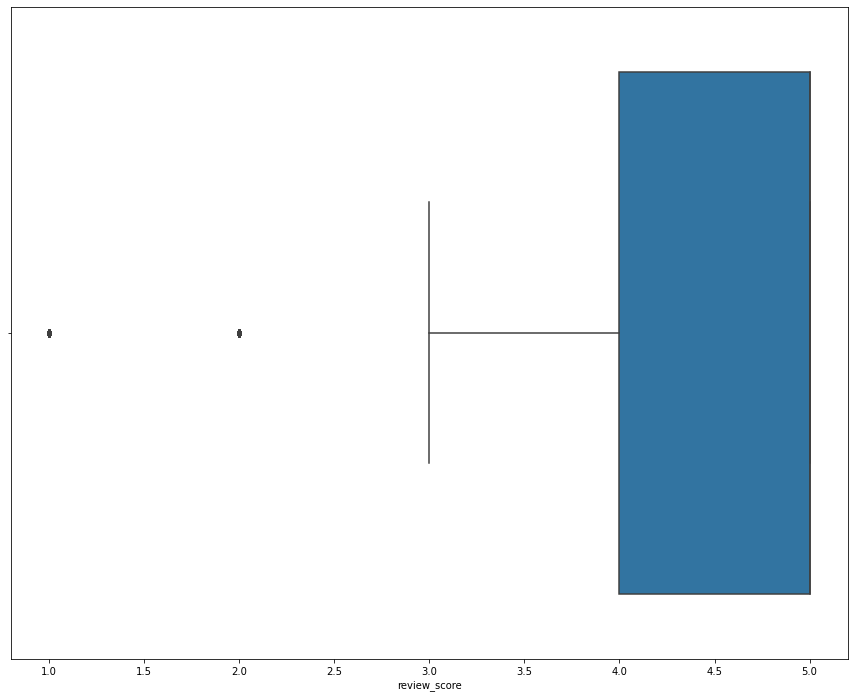

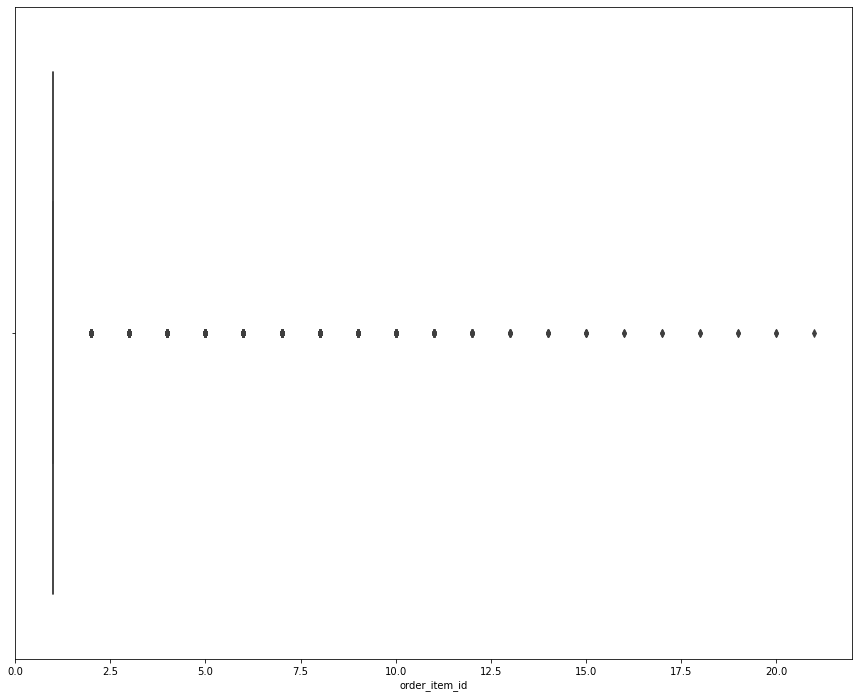

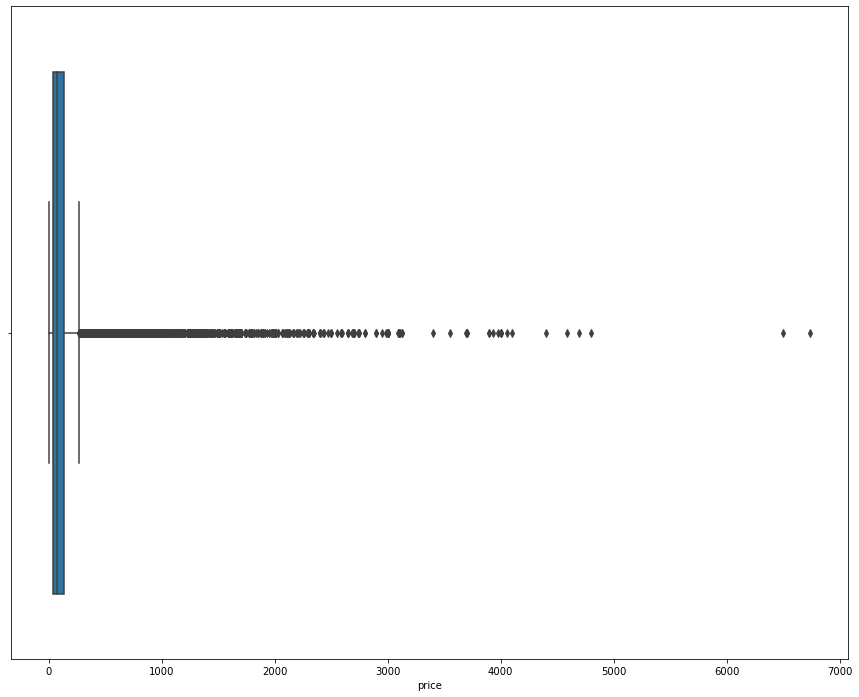

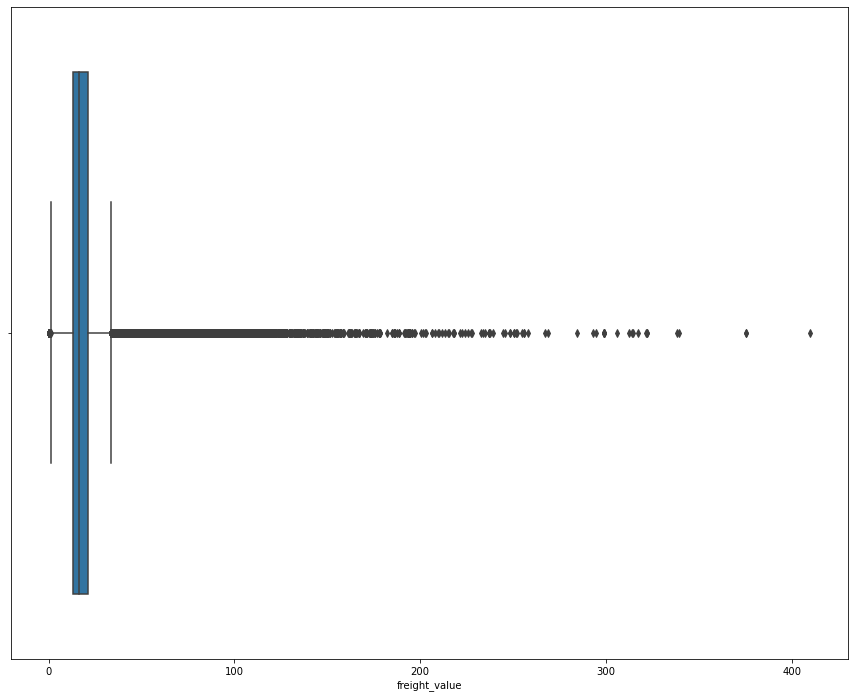

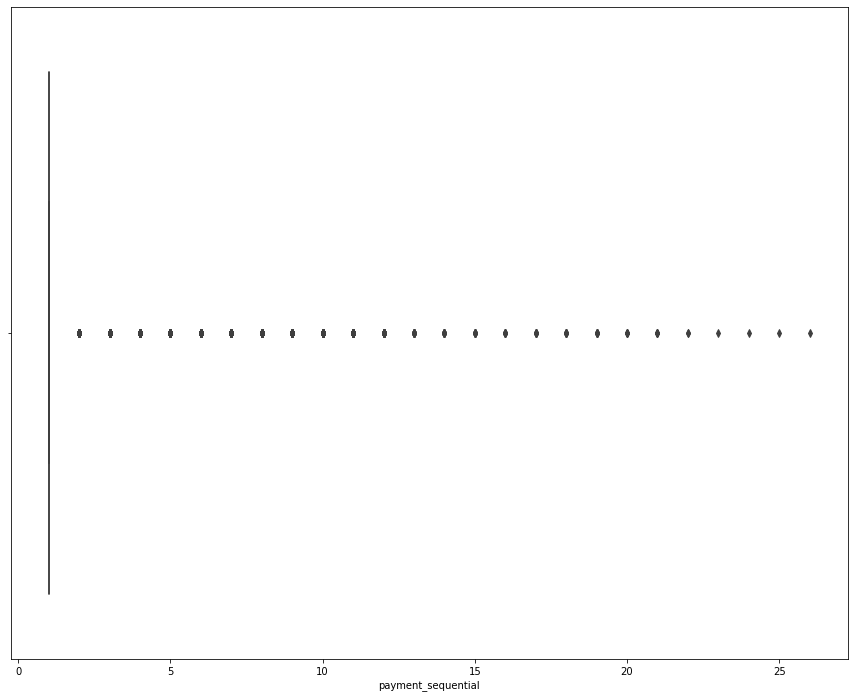

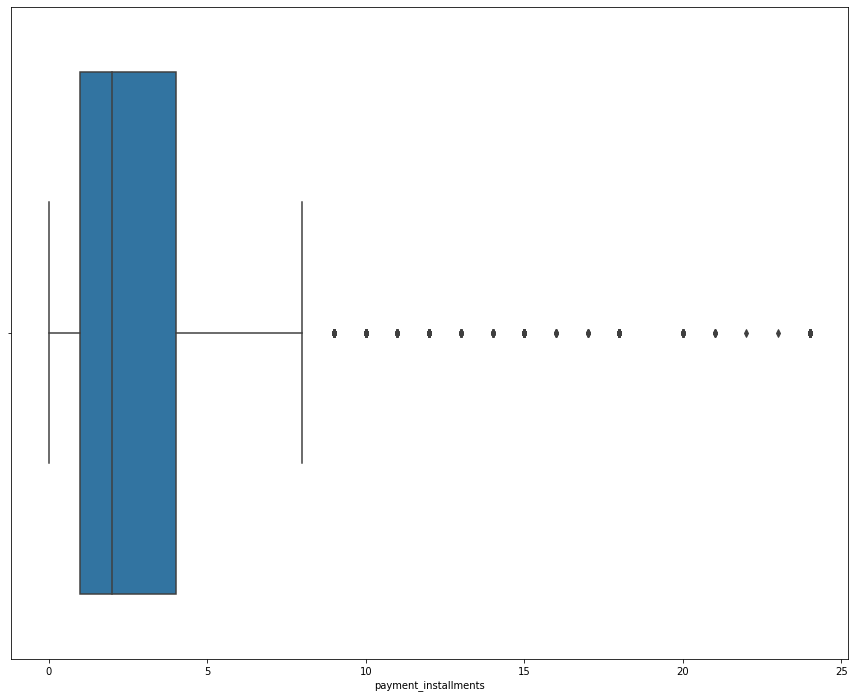

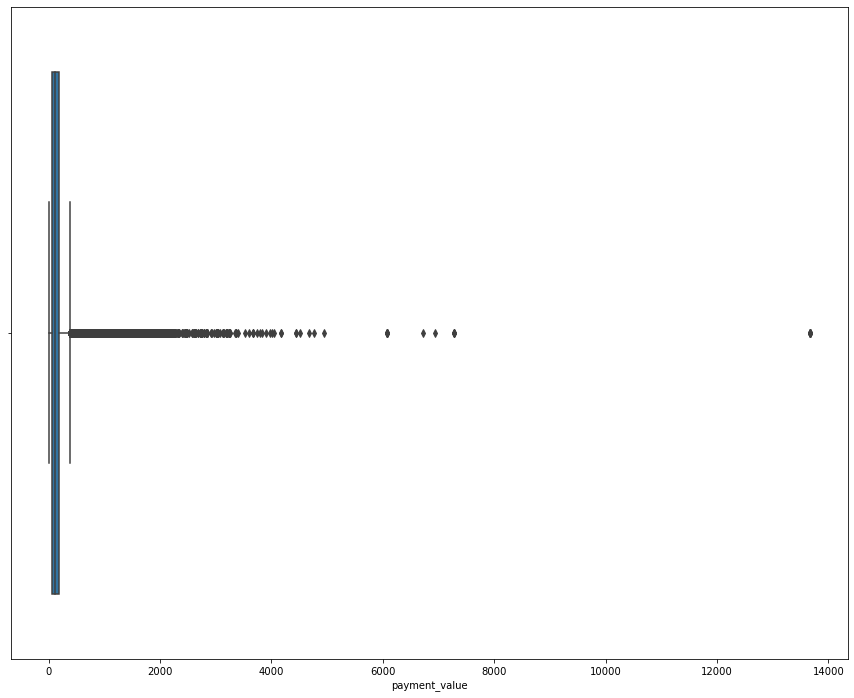

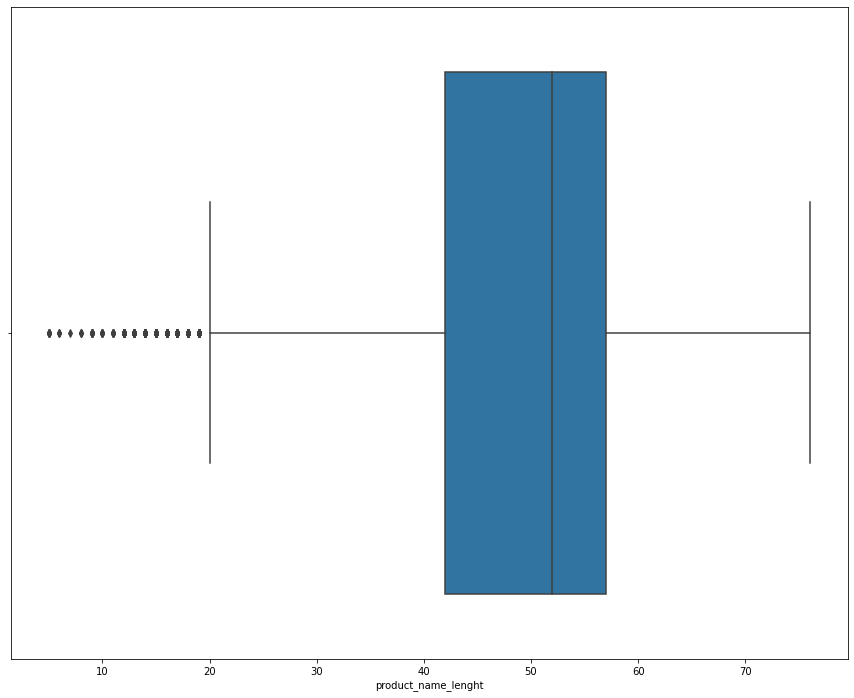

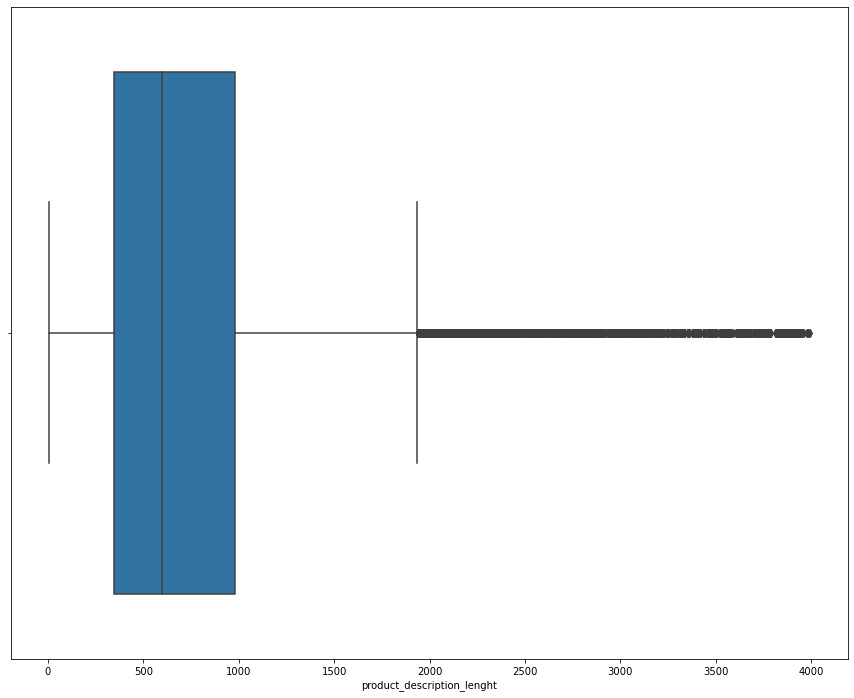

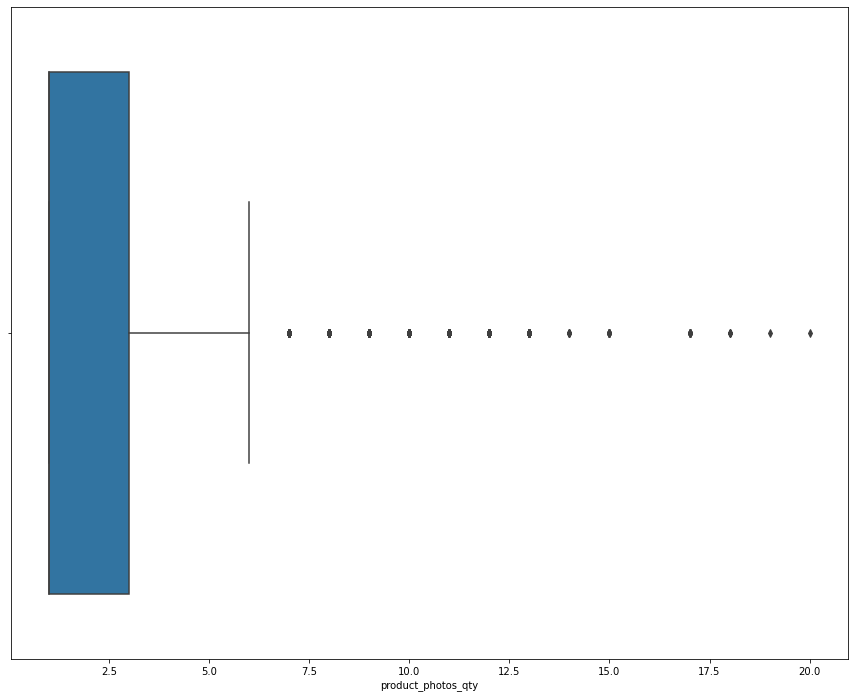

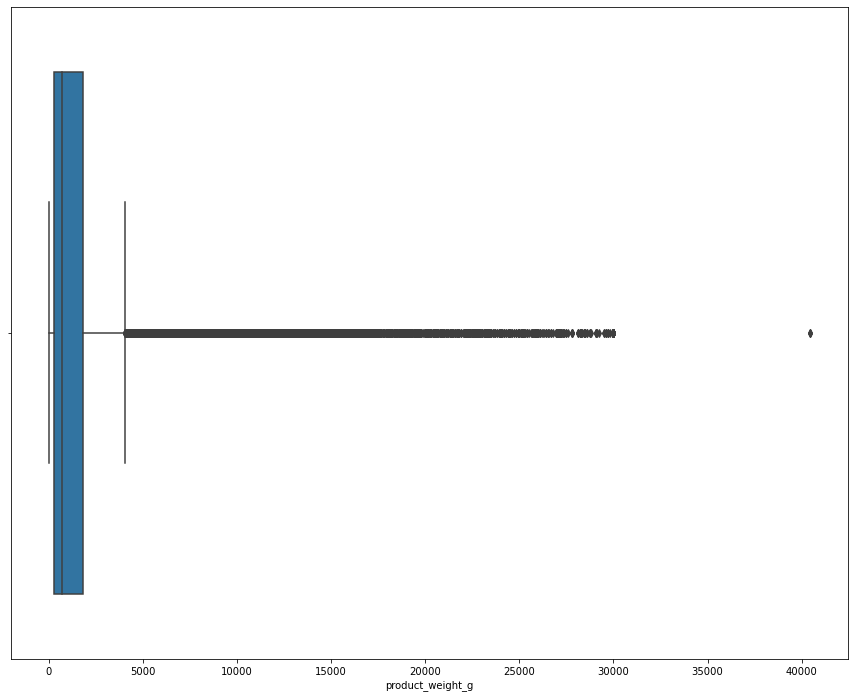

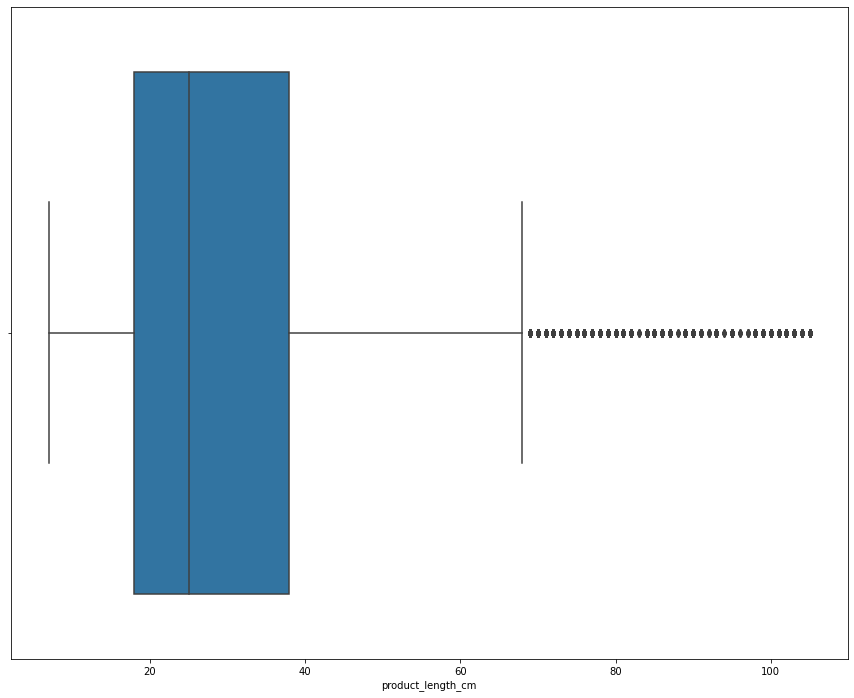

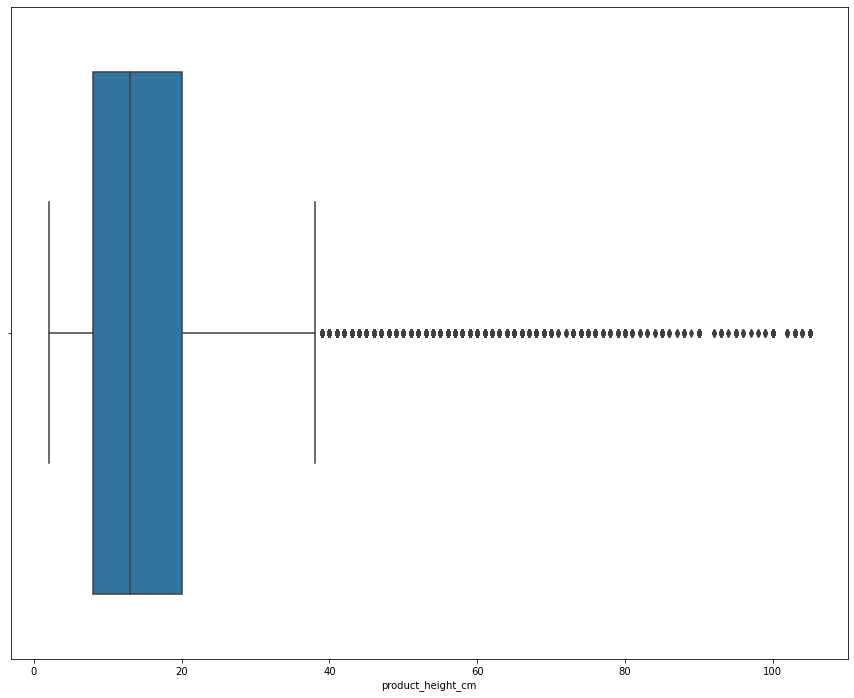

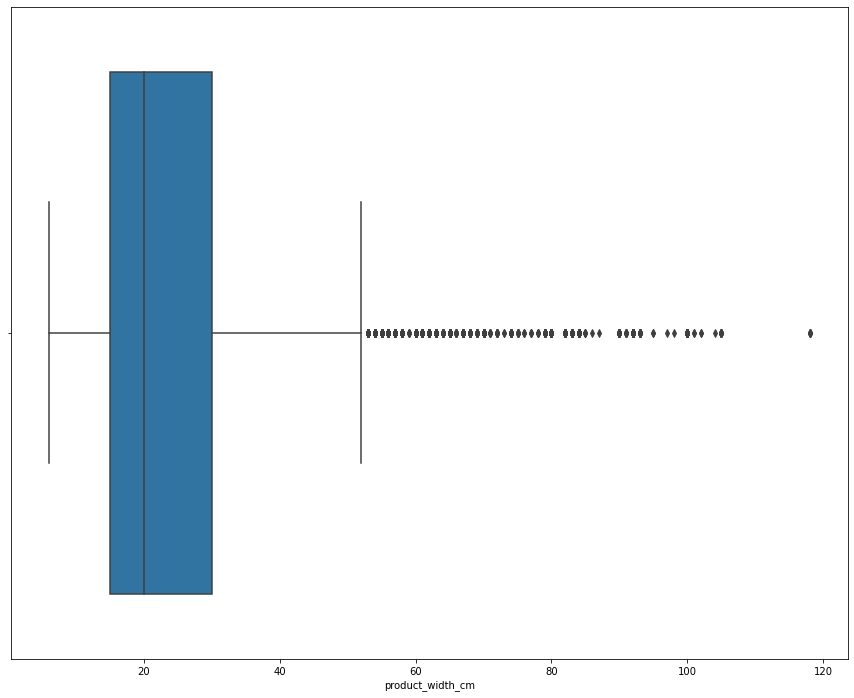

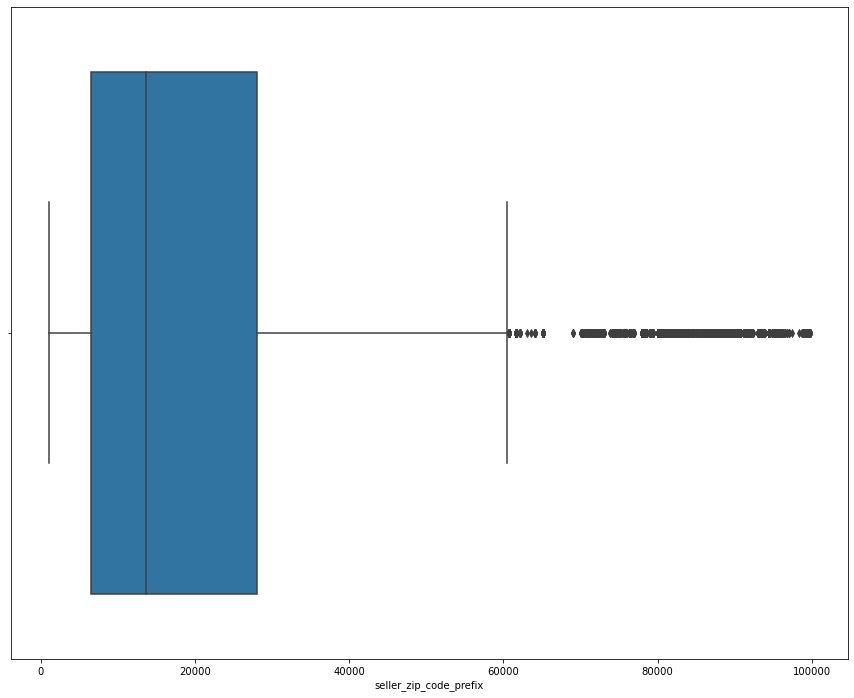

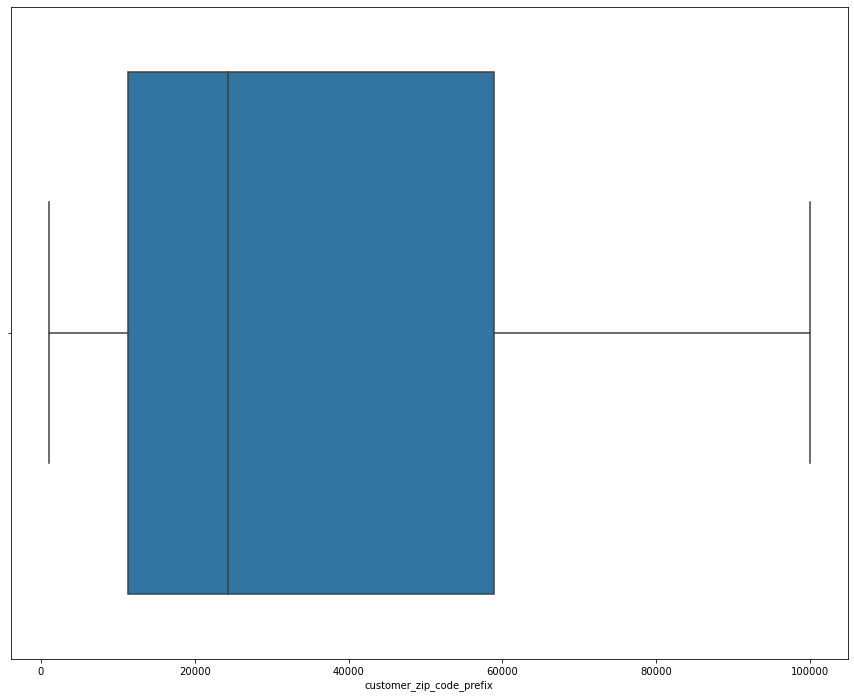

In [33]:
for col in df_num1.columns:
    sns.boxplot(df[col])
    plt.show()

**Interpretation**:We can see that they are outliers in the data .


In [34]:
df.groupby('customer_state').agg({'review_score': 'mean'}).reset_index().sort_values('review_score',ascending = False)

,customer_state,review_score
3,AP,4.280488
26,TO,4.186186
25,SP,4.177644
17,PR,4.145876
0,AC,4.127660
10,MG,4.121110
2,AM,4.100592
11,MS,4.095745
19,RN,4.085868
20,RO,4.085714


**Interpretation**:We can see that review_score at customer_state is high in AP followed by TO,SP,PR

## Univariant Analysis

## Target Variable

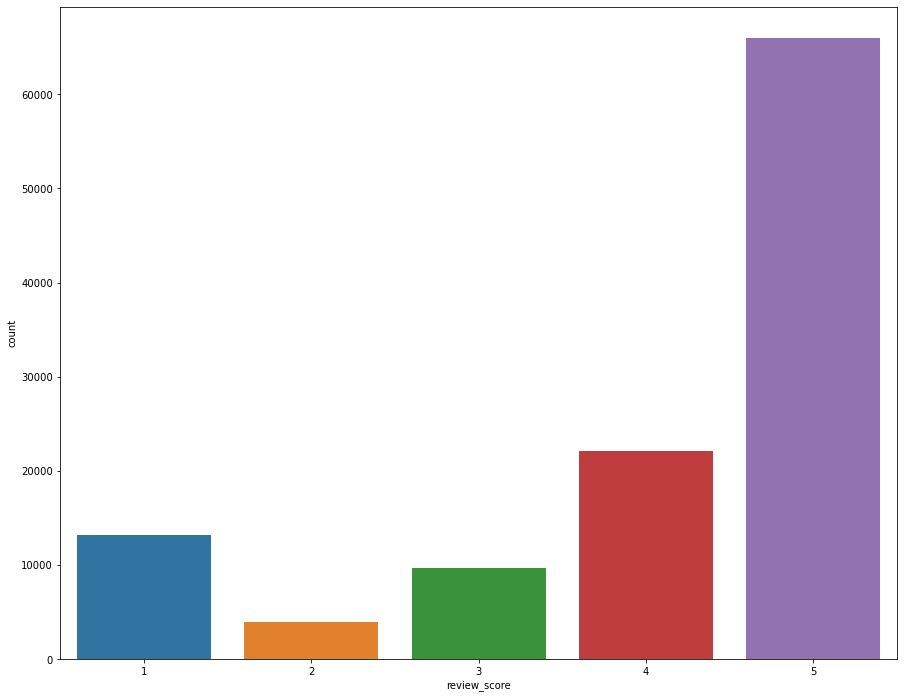

In [35]:
sns.countplot(df['review_score'])
plt.show()

**Interpretation**:The above graph shows that the review_score contains more 5  and 4 star rating 

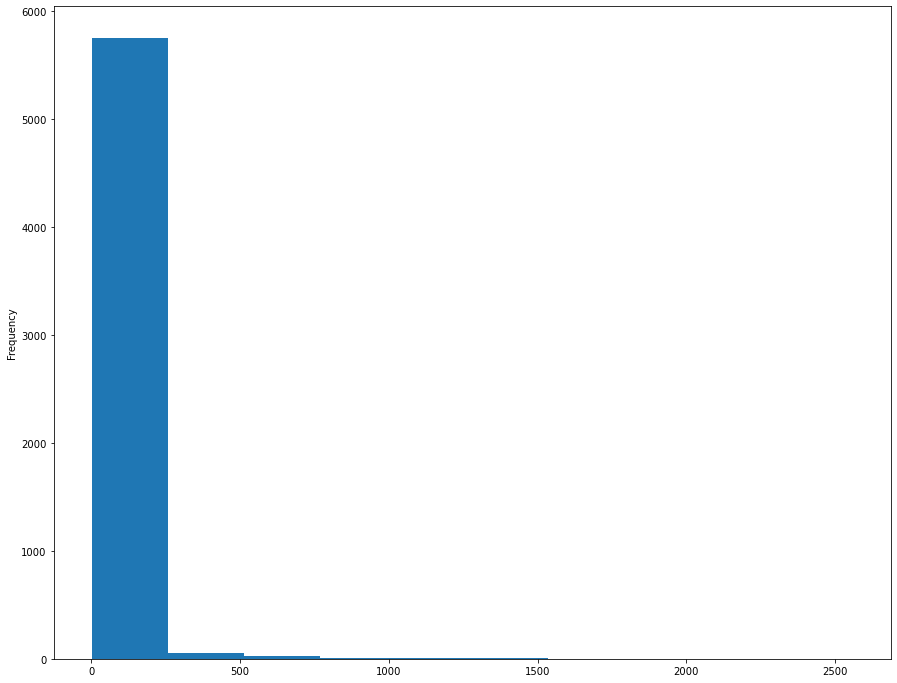

In [36]:
df['price'].value_counts().plot(kind='hist')
plt.show()

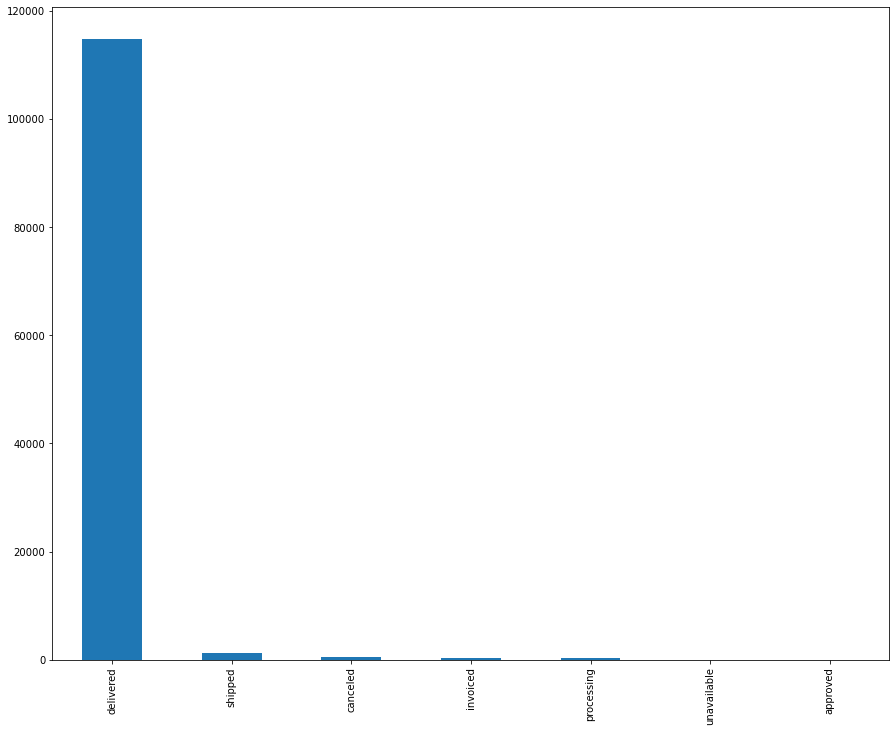

In [25]:
df['order_status'].value_counts().plot(kind='bar')
plt.show()

**Interpretation**: We can see that most of the order status are delivered from the above graph

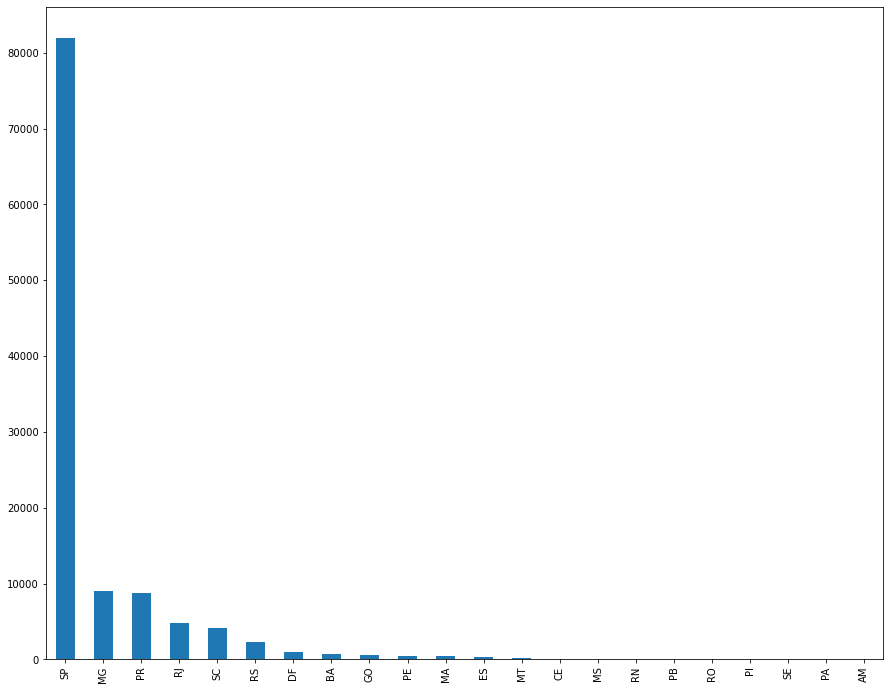

In [38]:
df['seller_state'].value_counts().plot(kind='bar')
plt.show()

**Interpretation**: We can see that the state SP  has more sellers  compared to other states

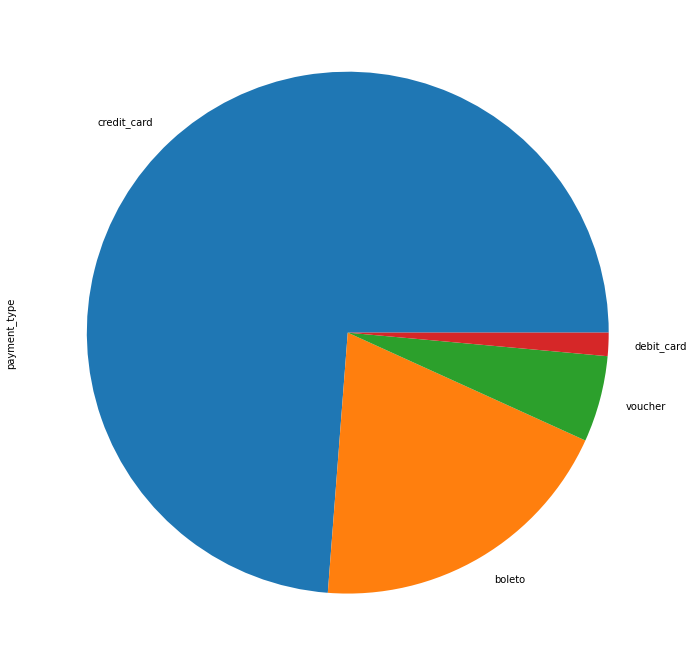

In [39]:
df['payment_type'].value_counts().plot(kind='pie')
plt.show()

**Interpretation**: We can see that the most of the payments are done by the credit card  and next is boleto from the above pie chat

## Bivariant Analysis

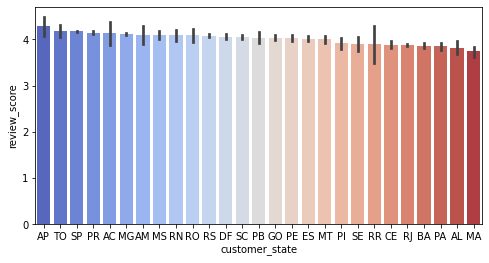

In [40]:
plt.figure(figsize=(8,4))
sns.barplot(x = 'customer_state', y = 'review_score', data = df, 
            order = df.groupby('customer_state').agg({'review_score':'mean'}).sort_values('review_score',ascending = False).index, palette = "coolwarm")
plt.savefig('review_score_state.eps')

**Interpretation**:We can see that review_score at customer_state is high in AP followed by TO,SP,PR

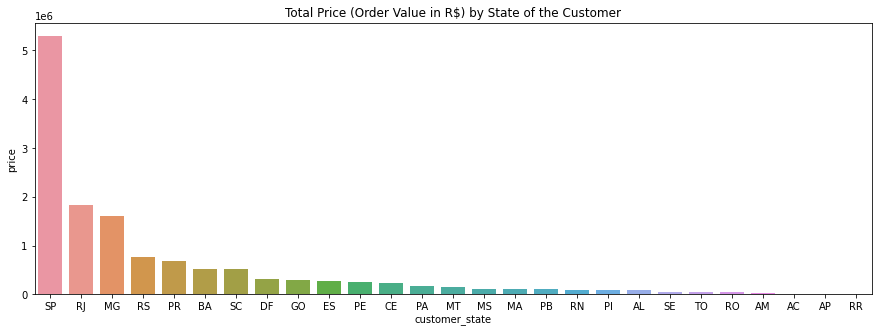

In [41]:
totalByState = df.groupby('customer_state')['price'].sum().sort_values(ascending=False)

plt.figure(figsize=(15,5))
plt.title('Total Price (Order Value in R$) by State of the Customer')
sns.barplot(x=totalByState.index, y=totalByState)
plt.show()

**Interpretation**: The above graph shows that the Customer_state SP is high in the terms of the order value 

In [34]:
df['estimated_delivery_time'] = (df['order_estimated_delivery_date']-df['order_approved_at']).dt.days.astype('timedelta64[D]')
df['real_delivery_time'] = (df['order_delivered_customer_date']-df['order_approved_at']).dt.days.astype('timedelta64[D]')
df['delay'] = (df['order_delivered_customer_date']-df['order_estimated_delivery_date']).dt.days.astype('timedelta64[D]')
df['review_before_delivery'] = (df['order_delivered_customer_date']-df['review_answer_timestamp']).dt.days.astype('timedelta64[D]')

**Interpretation**: We created new features by subtracting the old that can have effect on the review score

In [35]:
df['estimated_delivery_time'] = (df['estimated_delivery_time']/np.timedelta64(1, 'D')).astype(int)
df['real_delivery_time'] = (df['real_delivery_time']/np.timedelta64(1, 'D')).astype(int)
df['delay'] = (df['delay']/np.timedelta64(1, 'D')).astype(int)
df['review_before_delivery'] = (df['review_before_delivery']/np.timedelta64(1, 'D')).astype(int)

**Interpretation**: The data contains days in it. by diving with the  1 days we romoved  that days i.e; we are converting these columns to int format.

In [36]:
df['delay'] = df['delay'].apply(lambda x: x if x>0 else 0)
df['review_before_delivery'] = df['review_before_delivery'].apply(lambda x: 1 if x>0 else 0)
df['late'] = df['delay'].apply(lambda x: 1 if x>0 else 0)
df['freight_ratio'] = df['freight_value']/df['price']

**Interpretation**: The delay in days (if order arrives in advance, it is just zero delays)
A binary for review received before delivery. If the review has been received before the delivery: 1 otherwise: 0

In [37]:
df.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'estimated_delivery_time', 'real_delivery_time',
       'delay', 'review_before_delive

# Effect of lateness on review score

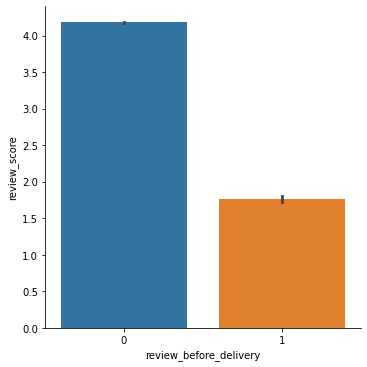

In [38]:
sns.catplot(x = 'review_before_delivery', y = 'review_score', data = df,kind="bar")
plt.savefig('influence_review_early.eps')

**Interpretation**:There is Huge impact of the lateness as you can see in the above graph

In [39]:
state_late_delivery_freq = df.groupby('customer_state').agg({'late':'mean'}).reset_index()
state_review_score = df.groupby('customer_state').agg({'review_score':'mean'}).reset_index()
df_state_review = state_late_delivery_freq.merge(state_review_score, how = 'inner', on = 'customer_state')

In [40]:
state_review_score

,customer_state,review_score
0,AC,4.127660
1,AL,3.814480
2,AM,4.100592
3,AP,4.280488
4,BA,3.864112
5,CE,3.881684
6,DF,4.053520
7,ES,4.009182
8,GO,4.030085
9,MA,3.740196


**Interpretation**: The above are the list of top states how had given the high review rating 

#We pick the orders in the dataset that have been delivered

In [41]:
df_delivered = df[df['order_status']=='delivered']

In [50]:
len(df_delivered)

114836

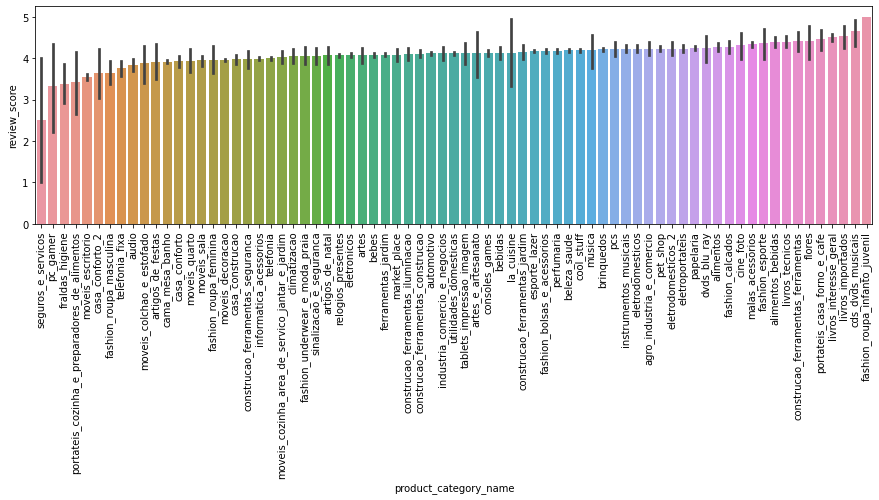

In [51]:
plt.figure(figsize=(15,4))

sns.barplot(x = 'product_category_name',y='review_score',data=df_delivered,
            order = df_delivered.groupby('product_category_name').agg({'review_score':'mean'}).sort_values('review_score').index)
plt.xticks(rotation =90)
plt.savefig('review_category.eps',bbox_inches = 'tight')

In [42]:
df_cs = df_delivered.drop(columns=['order_id','customer_id','order_status','order_purchase_timestamp','order_approved_at', 'product_category_name',
                                           'order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','payment_sequential',
                                          'payment_type','payment_installments','customer_unique_id','customer_zip_code_prefix','customer_city','customer_state',
                                   'review_id','review_comment_title','review_comment_message','review_creation_date','review_answer_timestamp','shipping_limit_date','seller_id','product_id'])

In [43]:
df_cs['simplified_review_score'] = df_cs['review_score'].apply(lambda x: 1 if (x==5 or x==4) else 0)

In [44]:
df_cs.dropna(how = 'any', inplace = True)

In [45]:
len(df_cs)

113210

In [46]:
df_cs.order_item_id.value_counts()/len(df_cs)

1     0.876124
2     0.087422
3     0.020201
4     0.008330
5     0.003904
6     0.002208
7     0.000530
8     0.000309
9     0.000247
10    0.000221
11    0.000150
12    0.000106
13    0.000062
14    0.000053
15    0.000035
16    0.000018
17    0.000018
18    0.000018
19    0.000018
20    0.000018
21    0.000009
Name: order_item_id, dtype: float64

In [47]:
df_cs = df_cs[df_cs['order_item_id'] == 1.0]

In [48]:
df_cs.drop(columns = 'order_item_id',inplace = True)

In [292]:
df_cs.describe()

,review_score,price,freight_value,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,estimated_delivery_time,real_delivery_time,delay,review_before_delivery,late,freight_ratio,simplified_review_score
count,99186.000000,99186.000000,99186.000000,99186.000000,99186.000000,99186.000000,99186.000000,99186.000000,99186.000000,99186.000000,99186.000000,99186.000000,99186.000000,99186.000000,99186.000000,99186.000000,99186.000000,99186.000000,99186.000000
mean,4.155788,125.057171,20.218937,152.859583,48.881657,791.075747,2.246728,2113.685742,30.223358,16.487055,23.117698,24700.857288,22.904805,11.620904,0.699605,0.043635,0.066068,0.310962,0.789123
std,1.284435,188.779902,15.822112,212.736649,9.984265,653.188607,1.743096,3778.257011,16.128876,13.311403,11.765739,27750.681221,8.786659,9.433531,4.559391,0.204283,0.248402,0.316190,0.407933
min,1.000000,0.850000,0.000000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,-7.000000,-7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,41.520000,13.340000,56.780000,43.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000,18.000000,6.000000,0.000000,0.000000,0.000000,0.132273,1.000000
50%,5.000000,79.000000,16.420000,99.900000,52.000000,605.000000,2.000000,700.000000,25.000000,13.000000,20.000000,13660.000000,22.000000,9.000000,0.000000,0.000000,0.000000,0.225114,1.000000
75%,5.000000,139.000000,21.270000,171.400000,57.000000,994.000000,3.000000,1813.000000,38.000000,20.000000,30.000000,29156.000000,28.000000,15.000000,0.000000,0.000000,0.000000,0.383495,1.000000
max,5.000000,6735.000000,409.680000,13664.080000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000,153.000000,208.000000,188.000000,1.000000,1.000000,21.447059,1.000000


In [49]:
df_cs= df_cs[df_cs['real_delivery_time']>0]
df_cs = df_cs[df_cs['estimated_delivery_time']>0]
df_cs.describe()

,review_score,price,freight_value,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,estimated_delivery_time,real_delivery_time,delay,review_before_delivery,late,freight_ratio,simplified_review_score
count,98947.000000,98947.000000,98947.000000,98947.000000,98947.000000,98947.000000,98947.000000,98947.000000,98947.000000,98947.000000,98947.000000,98947.000000,98947.000000,98947.000000,98947.000000,98947.000000,98947.000000,98947.000000,98947.000000
mean,4.155174,125.127034,20.239908,152.937296,48.878238,791.124764,2.245970,2115.810596,30.231447,16.493790,23.121863,24727.436820,22.933480,11.649782,0.700789,0.043710,0.066116,0.311152,0.788948
std,1.284817,188.883115,15.832635,212.831982,9.986515,653.369548,1.742463,3780.577875,16.131427,13.312946,11.769116,27764.877177,8.772299,9.426059,4.564377,0.204451,0.248486,0.316385,0.408058
min,1.000000,0.850000,0.000000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,41.800000,13.370000,56.850000,43.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000,18.000000,6.000000,0.000000,0.000000,0.000000,0.132444,1.000000
50%,5.000000,79.000000,16.430000,99.900000,52.000000,605.000000,2.000000,700.000000,25.000000,13.000000,20.000000,13690.000000,22.000000,9.000000,0.000000,0.000000,0.000000,0.225314,1.000000
75%,5.000000,139.195000,21.290000,171.440000,57.000000,994.000000,3.000000,1813.000000,38.000000,20.000000,30.000000,29260.000000,28.000000,15.000000,0.000000,0.000000,0.000000,0.383665,1.000000
max,5.000000,6735.000000,409.680000,13664.080000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000,153.000000,208.000000,188.000000,1.000000,1.000000,21.447059,1.000000


In [294]:
df_cs.head()

,review_score,price,freight_value,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,...,seller_zip_code_prefix,seller_city,seller_state,estimated_delivery_time,real_delivery_time,delay,review_before_delivery,late,freight_ratio,simplified_review_score
0,4,185.0,13.63,397.26,42.0,858.0,1.0,1300.0,30.0,30.0,...,14600,sao joaquim da barra,SP,21,6,0,0,0,0.073676,1
2,5,185.0,20.26,205.26,42.0,858.0,1.0,1300.0,30.0,30.0,...,14600,sao joaquim da barra,SP,31,14,0,0,0,0.109514,1
3,5,185.0,17.05,202.05,42.0,858.0,1.0,1300.0,30.0,30.0,...,14600,sao joaquim da barra,SP,31,19,0,0,0,0.092162,1
4,5,135.0,18.20,306.40,47.0,858.0,1.0,1600.0,30.0,30.0,...,14600,sao joaquim da barra,SP,23,17,0,0,0,0.134815,1
6,5,135.0,15.04,300.08,47.0,858.0,1.0,1600.0,30.0,30.0,...,14600,sao joaquim da barra,SP,24,9,0,0,0,0.111407,1


In [295]:
df_cs.columns

Index(['review_score', 'price', 'freight_value', 'payment_value',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'estimated_delivery_time',
       'real_delivery_time', 'delay', 'review_before_delivery', 'late',
       'freight_ratio', 'simplified_review_score'],
      dtype='object')

In [50]:
corr = df_cs.apply(lambda x: pd.factorize(x)[0]).corr()

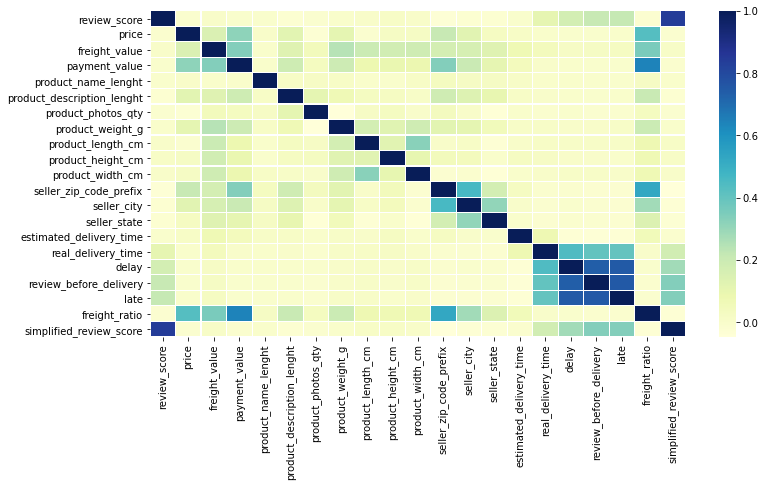

In [297]:
plt.figure(figsize=(12, 6))
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")
plt.savefig('corr_review.eps',bbox_inches = 'tight')

In [51]:
df_cs.drop(columns = ['product_name_lenght','product_height_cm','product_width_cm','product_weight_g','product_length_cm'],inplace = True)

In [52]:
df_cs.drop(['seller_zip_code_prefix', 'seller_city'], axis = 1, inplace = True)

In [53]:
df_cs_simp = df_cs.copy()

In [301]:
df_cs_simp.dtypes

review_score                    int64
price                         float64
freight_value                 float64
payment_value                 float64
product_description_lenght    float64
product_photos_qty            float64
seller_state                   object
estimated_delivery_time         int32
real_delivery_time              int32
delay                           int64
review_before_delivery          int64
late                            int64
freight_ratio                 float64
simplified_review_score         int64
dtype: object

In [54]:
y = df_cs_simp['simplified_review_score']

In [55]:
df_cs_simp.drop(['review_score','simplified_review_score'],  axis = 1, inplace = True)

In [56]:
df_cat = df_cs_simp.select_dtypes(include=[np.object])
df_num = df_cs_simp.select_dtypes(include=[np.number])

In [58]:
df_cs.columns

Index(['review_score', 'price', 'freight_value', 'payment_value',
       'product_description_lenght', 'product_photos_qty', 'seller_state',
       'estimated_delivery_time', 'real_delivery_time', 'delay',
       'review_before_delivery', 'late', 'freight_ratio',
       'simplified_review_score'],
      dtype='object')

<AxesSubplot:>

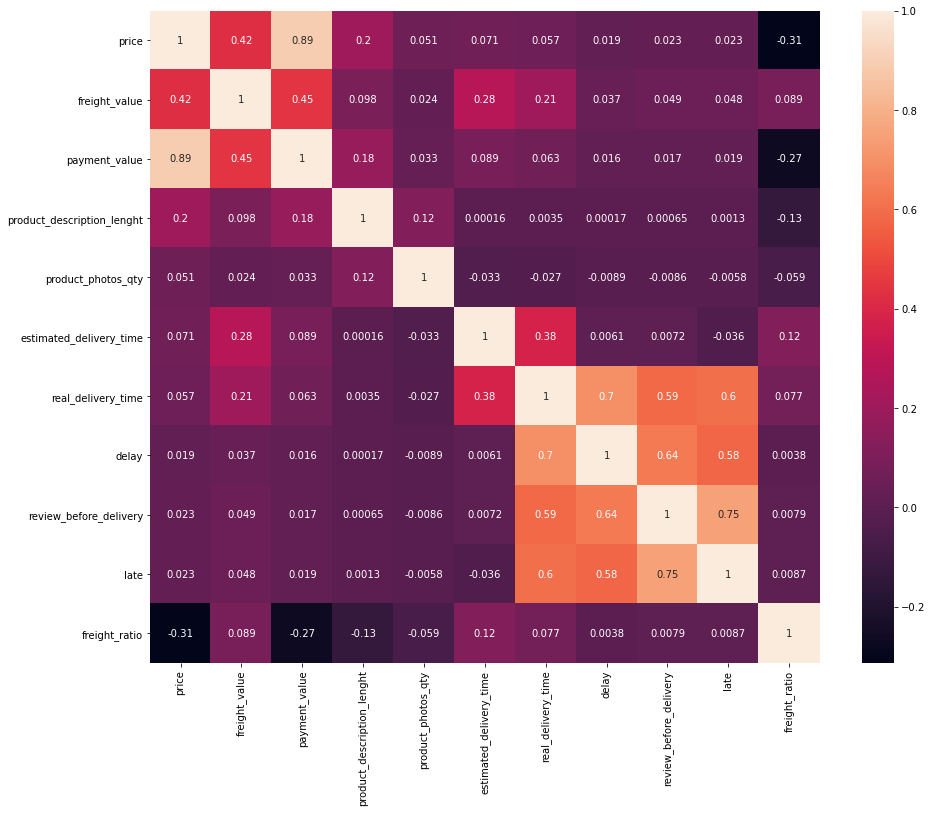

In [305]:
sns.heatmap(df_num.corr(), annot = True)

**Interpretation**: The above Heat map says that the Multicollinearity is high for the price column that is 0.89 

In [306]:
#statistical test
from statsmodels.stats import weightstats as stests
for i in df_cs.select_dtypes(include = np.number).drop('simplified_review_score', axis = 1).columns:
    n0_price = df_cs[(df_cs['simplified_review_score'] == 0)][i]

    n1_price =df_cs[(df_cs['simplified_review_score'] == 1)][i]

    z_score, pval = stests.ztest(x1 = n0_price, x2 = n1_price)

    print("p-value of {} : {}".format(i,pval))

p-value of review_score : 0.0
p-value of price : 0.8679776550872498
p-value of freight_value : 1.7955737872958672e-20
p-value of payment_value : 3.0557646954318625e-23
p-value of product_description_lenght : 1.901227709126657e-06
p-value of product_photos_qty : 0.0002845776386473294
p-value of estimated_delivery_time : 2.215065951212395e-46
p-value of real_delivery_time : 0.0
p-value of delay : 0.0
p-value of review_before_delivery : 0.0
p-value of late : 0.0
p-value of freight_ratio : 4.9104660626744474e-14


**Interpretation**:After performing the statistical test we came to know that the price  column is insignificant but we dont remove that columns we check the results ot impact of that columns after buliding the model

In [307]:
df_cs.head()

,review_score,price,freight_value,payment_value,product_description_lenght,product_photos_qty,seller_state,estimated_delivery_time,real_delivery_time,delay,review_before_delivery,late,freight_ratio,simplified_review_score
0,4,185.0,13.63,397.26,858.0,1.0,SP,21,6,0,0,0,0.073676,1
2,5,185.0,20.26,205.26,858.0,1.0,SP,31,14,0,0,0,0.109514,1
3,5,185.0,17.05,202.05,858.0,1.0,SP,31,19,0,0,0,0.092162,1
4,5,135.0,18.20,306.40,858.0,1.0,SP,23,17,0,0,0,0.134815,1
6,5,135.0,15.04,300.08,858.0,1.0,SP,24,9,0,0,0,0.111407,1


In [308]:
df_cs_simp.head()

,price,freight_value,payment_value,product_description_lenght,product_photos_qty,seller_state,estimated_delivery_time,real_delivery_time,delay,review_before_delivery,late,freight_ratio
0,185.0,13.63,397.26,858.0,1.0,SP,21,6,0,0,0,0.073676
2,185.0,20.26,205.26,858.0,1.0,SP,31,14,0,0,0,0.109514
3,185.0,17.05,202.05,858.0,1.0,SP,31,19,0,0,0,0.092162
4,135.0,18.20,306.40,858.0,1.0,SP,23,17,0,0,0,0.134815
6,135.0,15.04,300.08,858.0,1.0,SP,24,9,0,0,0,0.111407


In [309]:
df_cat.shape

(98947, 1)

In [310]:
X = df_cs_simp.copy()
X.head()

,price,freight_value,payment_value,product_description_lenght,product_photos_qty,seller_state,estimated_delivery_time,real_delivery_time,delay,review_before_delivery,late,freight_ratio
0,185.0,13.63,397.26,858.0,1.0,SP,21,6,0,0,0,0.073676
2,185.0,20.26,205.26,858.0,1.0,SP,31,14,0,0,0,0.109514
3,185.0,17.05,202.05,858.0,1.0,SP,31,19,0,0,0,0.092162
4,135.0,18.20,306.40,858.0,1.0,SP,23,17,0,0,0,0.134815
6,135.0,15.04,300.08,858.0,1.0,SP,24,9,0,0,0,0.111407


In [311]:
#Train_test_split(spliting the data)

In [312]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42, stratify = y)

print('X train shape:', X_train.shape)
print('X test shape:', X_test.shape)
print('y train shape:', y_train.shape)
print('y test shape:', y_test.shape)

X train shape: (74210, 12)
X test shape: (24737, 12)
y train shape: (74210,)
y test shape: (24737,)


In [313]:
#scalling the data 

In [314]:
X_num = X_train.select_dtypes([np.number])

In [315]:
X_cat = X_train.select_dtypes('O')

In [316]:
X_cat

,seller_state
65843,SC
98904,SP
1826,SP
22435,SP
109969,SP
...,...
36939,SP
28820,RJ
64173,SP
97824,MG


In [317]:
X_cat = pd.get_dummies(X_cat, drop_first = True).reset_index(drop=True)
X_cat

,seller_state_BA,seller_state_CE,seller_state_DF,seller_state_ES,seller_state_GO,seller_state_MA,seller_state_MG,seller_state_MS,seller_state_MT,seller_state_PA,...,seller_state_PE,seller_state_PI,seller_state_PR,seller_state_RJ,seller_state_RN,seller_state_RO,seller_state_RS,seller_state_SC,seller_state_SE,seller_state_SP
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
74206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
74207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
74208,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [318]:
X_num

,price,freight_value,payment_value,product_description_lenght,product_photos_qty,estimated_delivery_time,real_delivery_time,delay,review_before_delivery,late,freight_ratio
65843,129.99,24.06,154.05,275.0,2.0,11,9,0,0,0,0.185091
98904,189.00,45.40,234.40,1254.0,5.0,19,5,0,0,0,0.240212
1826,139.90,14.00,153.90,234.0,1.0,20,2,0,0,0,0.100071
22435,53.90,13.46,67.36,348.0,2.0,18,7,0,0,0,0.249722
109969,89.15,15.38,104.53,138.0,1.0,19,6,0,0,0,0.172518
...,...,...,...,...,...,...,...,...,...,...,...
36939,89.90,7.88,97.78,1156.0,1.0,12,3,0,0,0,0.087653
28820,69.90,17.74,87.64,1619.0,1.0,25,11,0,0,0,0.253791
64173,61.90,18.23,80.13,769.0,1.0,33,5,0,0,0,0.294507
97824,139.90,15.73,155.63,2047.0,1.0,18,15,0,0,0,0.112437


In [319]:
ss = StandardScaler()
X_num = pd.DataFrame(ss.fit_transform(X_num), columns = X_num.columns)

In [320]:
X_cat.shape

(74210, 21)

In [321]:
X_train_final = pd.concat([X_num, X_cat], axis = 1)

In [322]:
X_train_final.shape

(74210, 32)

In [323]:
X_test_num = X_test.select_dtypes([np.number])
X_test_cat = X_test.select_dtypes('O')

In [324]:
X_test_cat = pd.get_dummies(X_test_cat, drop_first = True).reset_index(drop= True)
X_test_cat

,seller_state_BA,seller_state_CE,seller_state_DF,seller_state_ES,seller_state_GO,seller_state_MA,seller_state_MG,seller_state_MS,seller_state_MT,seller_state_PA,...,seller_state_PE,seller_state_PI,seller_state_PR,seller_state_RJ,seller_state_RN,seller_state_RO,seller_state_RS,seller_state_SC,seller_state_SE,seller_state_SP
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24732,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24733,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24734,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24735,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [325]:
X_test_cat.shape

(24737, 21)

In [326]:
X_test_num = pd.DataFrame(ss.transform(X_test_num), columns = X_test_num.columns)

In [327]:
X_test_num.shape

(24737, 11)

In [328]:
X_test_final = pd.concat([X_test_num, X_test_cat], axis = 1)

In [329]:
X_test_final.head()

,price,freight_value,payment_value,product_description_lenght,product_photos_qty,estimated_delivery_time,real_delivery_time,delay,review_before_delivery,late,...,seller_state_PE,seller_state_PI,seller_state_PR,seller_state_RJ,seller_state_RN,seller_state_RO,seller_state_RS,seller_state_SC,seller_state_SE,seller_state_SP
0,0.715414,4.491027,0.937944,-0.180595,-0.715157,1.151838,-0.173748,-0.155637,-0.213666,-0.266324,...,0,0,0,0,0,0,0,0,0,1
1,-0.482635,-0.524464,-0.502849,-1.057110,1.005960,-0.331999,-0.280437,-0.155637,-0.213666,-0.266324,...,0,0,0,0,0,0,0,0,0,1
2,-0.361662,0.420847,-0.324418,-0.628015,-0.715157,0.695273,2.493482,0.955543,4.680205,3.754821,...,0,0,0,0,0,0,0,0,0,1
3,-0.537309,-0.582879,-0.555803,0.731043,1.579665,0.352849,-0.387126,-0.155637,-0.213666,-0.266324,...,0,0,0,0,0,0,0,0,0,1
4,-0.144240,-0.410148,-0.193660,-0.418811,-0.141451,-0.331999,-0.600505,-0.155637,-0.213666,-0.266324,...,0,0,0,0,0,0,0,0,0,1


In [330]:
X_train_final.shape

(74210, 32)

In [331]:
X_test_final.shape

(24737, 32)

In [332]:
#basic_model_buliding

In [333]:
scorecard=pd.DataFrame(columns=['Model','tn','fp','fn','tp','Precision','Recall','F1_score','AUC','Train_Accuracy','Test_Accuracy','Kappa_score'])
def bulid_model(model_name,classifier,X_train_final,y_train,X_test_final,y_test):
    
    # traing data 
    model=classifier.fit(X_train_final,y_train)
    y_train_pred=model.predict(X_train_final)
    print('Performance of the model on Training Data:\n')
    print('Confusion matrix:\n')
    print(confusion_matrix(y_train,y_train_pred))
    print()
    print('Classification report:\n')
    print(classification_report(y_train,y_train_pred))
    print()
    #testing data
    y_test_pred=model.predict(X_test_final)
    print('Performance of the model on testing Data:\n')
    print('Confusion matrix:\n')
    print(confusion_matrix(y_test,y_test_pred))
    print()
    print('Classification report:\n')
    print(classification_report(y_test,y_test_pred))
    print()
    Train_accuracy=model.score(X_train_final,y_train)
    Test_accuracy=model.score(X_test_final,y_test)
    print('Training Accuracy:',Train_accuracy)
    print('Testing Accuracy:',Test_accuracy)
    
    tn,fp,fn,tp=confusion_matrix(y_test,y_test_pred).flatten()
    
    print()
    print('ROC AUC graph:')
    y_test_pred_prob=model.predict_proba(X_test_final)[:,1]
    fpr,tpr,threshold=roc_curve(y_test,y_test_pred_prob)
    plt.plot(fpr, tpr, label = classifier.__class__.__name__)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('FPR (False Positive Rate || 1 - Specificity)')
    plt.ylabel('TPR (True Positive Rate || Sensitivity)')
    plt.title('ROC Analysis for Adult Salary Dataset')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    global scorecard
    scorecard=scorecard.append({'Model':model_name
                               ,'tn':tn
                               ,'fp':fp
                               ,'fn':fn
                               ,'tp':tp
                               ,'Precision':precision_score(y_test,y_test_pred)
                               ,'Recall':recall_score(y_test,y_test_pred)
                               ,'F1_score':f1_score(y_test,y_test_pred)
                               ,'AUC':roc_auc_score(y_test,y_test_pred_prob)
                               ,'Train_Accuracy':Train_accuracy
                               ,'Test_Accuracy':Test_accuracy
                               ,'Kappa_score':cohen_kappa_score(y_test,y_test_pred)},ignore_index=True)

## 1. RandomForestClassifier

Performance of the model on Training Data:

Confusion matrix:

[[15522   140]
 [   41 58507]]

Classification report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15662
           1       1.00      1.00      1.00     58548

    accuracy                           1.00     74210
   macro avg       1.00      1.00      1.00     74210
weighted avg       1.00      1.00      1.00     74210


Performance of the model on testing Data:

Confusion matrix:

[[ 1364  3857]
 [  559 18957]]

Classification report:

              precision    recall  f1-score   support

           0       0.71      0.26      0.38      5221
           1       0.83      0.97      0.90     19516

    accuracy                           0.82     24737
   macro avg       0.77      0.62      0.64     24737
weighted avg       0.81      0.82      0.79     24737


Training Accuracy: 0.9975609756097561
Testing Accuracy: 0.8214819905404859

ROC AUC graph:


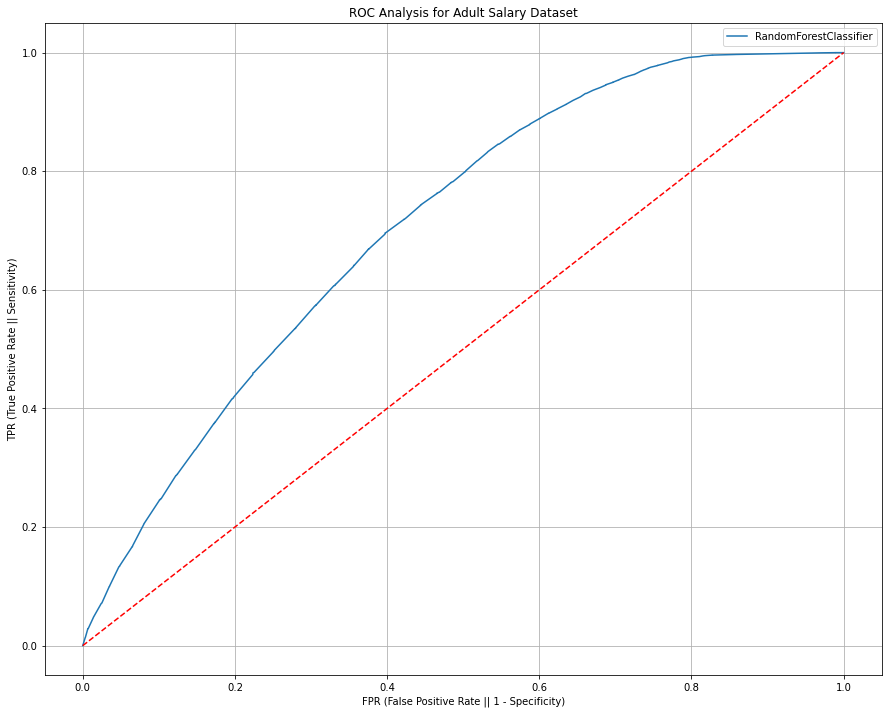

In [334]:
RF=RandomForestClassifier(random_state=10)
bulid_model('RandomForest',RF,X_train_final,y_train,X_test_final,y_test)

In [335]:
scorecard

,Model,tn,fp,fn,tp,Precision,Recall,F1_score,AUC,Train_Accuracy,Test_Accuracy,Kappa_score
0,RandomForest,1364,3857,559,18957,0.830937,0.971357,0.895677,0.707949,0.997561,0.821482,0.302619


## 2.DecisionTreeClassifier

Performance of the model on Training Data:

Confusion matrix:

[[15654     8]
 [  171 58377]]

Classification report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15662
           1       1.00      1.00      1.00     58548

    accuracy                           1.00     74210
   macro avg       0.99      1.00      1.00     74210
weighted avg       1.00      1.00      1.00     74210


Performance of the model on testing Data:

Confusion matrix:

[[ 1966  3255]
 [ 3550 15966]]

Classification report:

              precision    recall  f1-score   support

           0       0.36      0.38      0.37      5221
           1       0.83      0.82      0.82     19516

    accuracy                           0.72     24737
   macro avg       0.59      0.60      0.60     24737
weighted avg       0.73      0.72      0.73     24737


Training Accuracy: 0.9975879261555046
Testing Accuracy: 0.7249060112382262

ROC AUC graph:


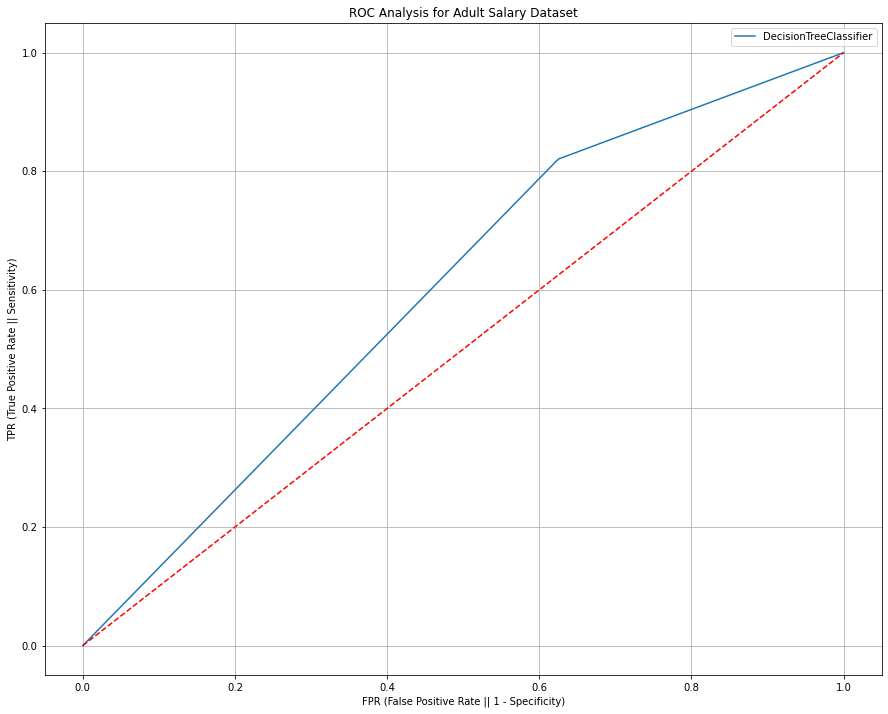

In [336]:
DT=DecisionTreeClassifier(random_state=10)
bulid_model('DecisionTreeClassifier',DT,X_train_final,y_train,X_test_final,y_test)


## 3.AdaBoostClassifier

Performance of the model on Training Data:

Confusion matrix:

[[ 3328 12334]
 [  816 57732]]

Classification report:

              precision    recall  f1-score   support

           0       0.80      0.21      0.34     15662
           1       0.82      0.99      0.90     58548

    accuracy                           0.82     74210
   macro avg       0.81      0.60      0.62     74210
weighted avg       0.82      0.82      0.78     74210


Performance of the model on testing Data:

Confusion matrix:

[[ 1079  4142]
 [  286 19230]]

Classification report:

              precision    recall  f1-score   support

           0       0.79      0.21      0.33      5221
           1       0.82      0.99      0.90     19516

    accuracy                           0.82     24737
   macro avg       0.81      0.60      0.61     24737
weighted avg       0.82      0.82      0.78     24737


Training Accuracy: 0.8228001617032745
Testing Accuracy: 0.8209968872539112

ROC AUC graph:


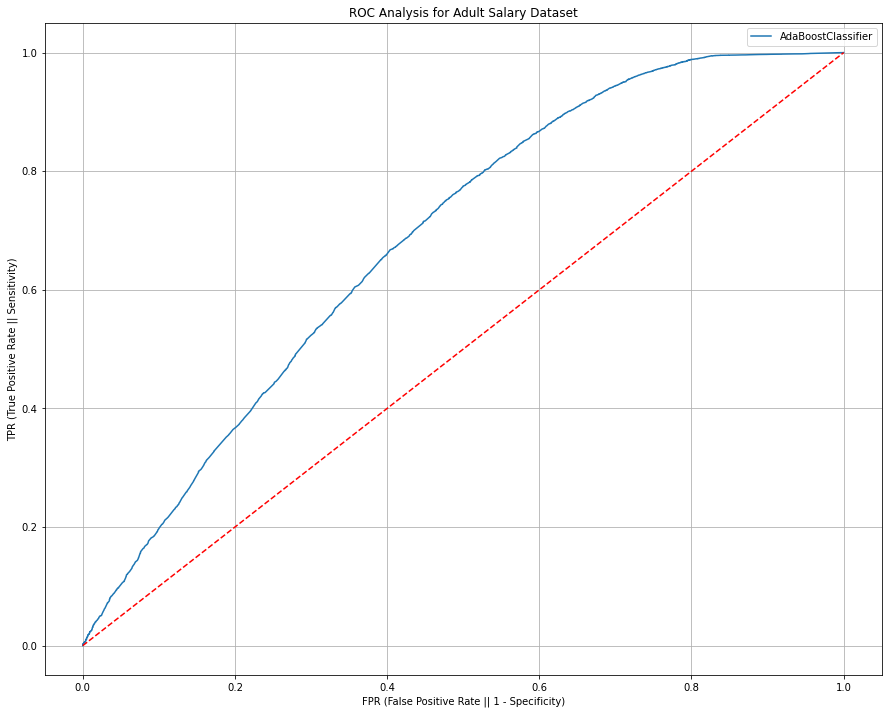

In [337]:
Ad=AdaBoostClassifier(random_state=10)
bulid_model('AdaBoostClassifier',Ad,X_train_final,y_train,X_test_final,y_test)

## 4. KNeighborsClassifier

Performance of the model on Training Data:

Confusion matrix:

[[ 5927  9735]
 [ 1711 56837]]

Classification report:

              precision    recall  f1-score   support

           0       0.78      0.38      0.51     15662
           1       0.85      0.97      0.91     58548

    accuracy                           0.85     74210
   macro avg       0.81      0.67      0.71     74210
weighted avg       0.84      0.85      0.82     74210


Performance of the model on testing Data:

Confusion matrix:

[[ 1369  3852]
 [ 1036 18480]]

Classification report:

              precision    recall  f1-score   support

           0       0.57      0.26      0.36      5221
           1       0.83      0.95      0.88     19516

    accuracy                           0.80     24737
   macro avg       0.70      0.60      0.62     24737
weighted avg       0.77      0.80      0.77     24737


Training Accuracy: 0.8457620266810403
Testing Accuracy: 0.802401261268545

ROC AUC graph:


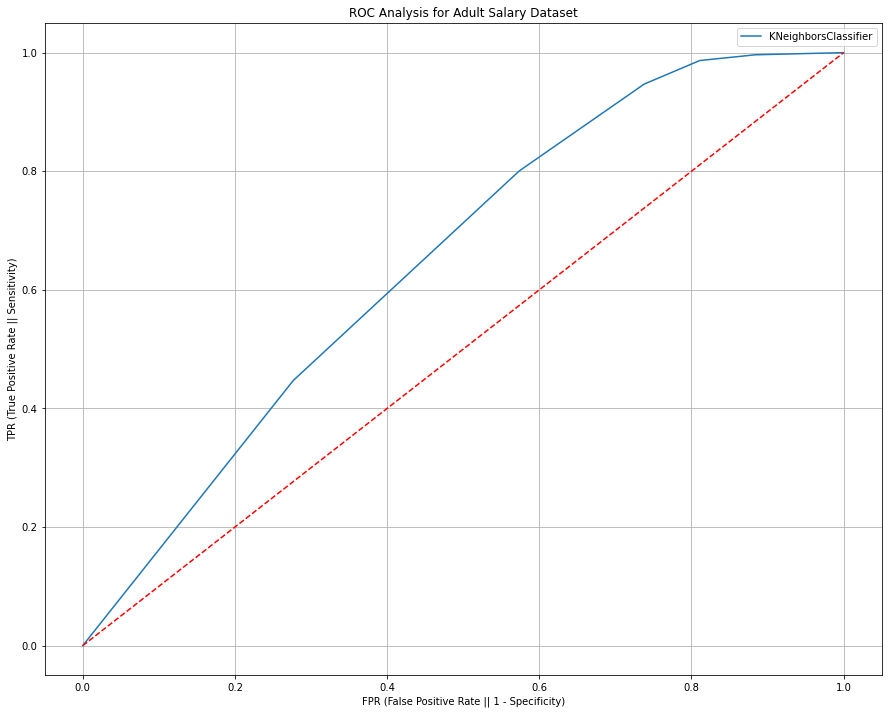

In [338]:
KN=KNeighborsClassifier()
bulid_model('KNeighborsClassifier',KN,X_train_final,y_train,X_test_final,y_test)

## 5.GradientBoostingClassifier

Performance of the model on Training Data:

Confusion matrix:

[[ 3435 12227]
 [  757 57791]]

Classification report:

              precision    recall  f1-score   support

           0       0.82      0.22      0.35     15662
           1       0.83      0.99      0.90     58548

    accuracy                           0.83     74210
   macro avg       0.82      0.60      0.62     74210
weighted avg       0.82      0.83      0.78     74210


Performance of the model on testing Data:

Confusion matrix:

[[ 1102  4119]
 [  282 19234]]

Classification report:

              precision    recall  f1-score   support

           0       0.80      0.21      0.33      5221
           1       0.82      0.99      0.90     19516

    accuracy                           0.82     24737
   macro avg       0.81      0.60      0.62     24737
weighted avg       0.82      0.82      0.78     24737


Training Accuracy: 0.8250370570004043
Testing Accuracy: 0.8220883696487044

ROC AUC graph:


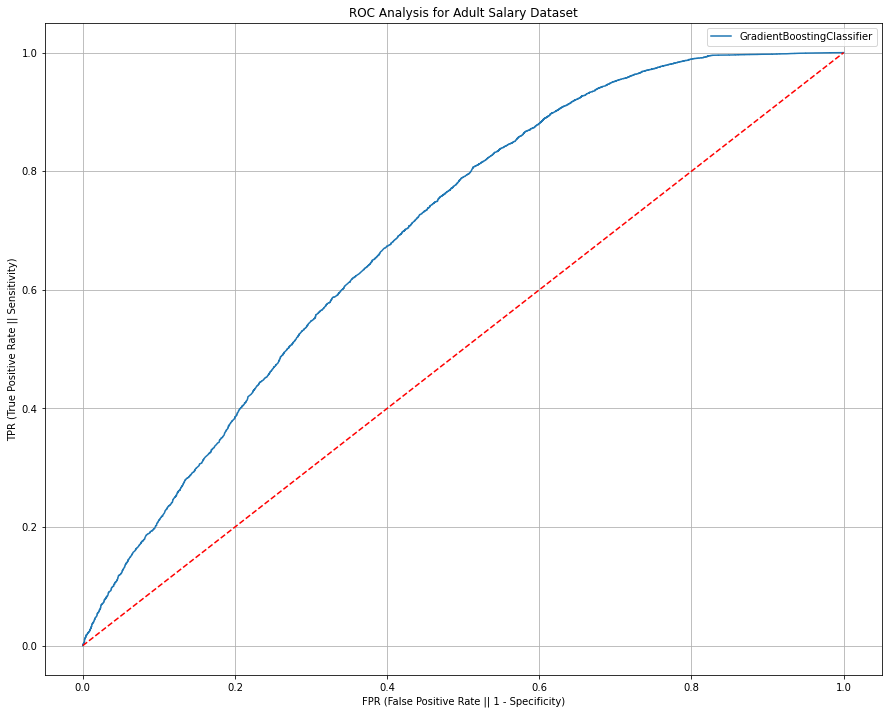

In [339]:
GC=GradientBoostingClassifier(random_state=10)
bulid_model('GradientBoostingClassifier',GC,X_train_final,y_train,X_test_final,y_test)

In [340]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, VotingClassifier

In [341]:
base_estimators = [('Decison tree', DecisionTreeClassifier()), 
                  ('Random Forest', RandomForestClassifier()), 
                  ('Log Reg', LogisticRegression()), 
                  ('Bagging classifier', BaggingClassifier())]

In [342]:
vote_hard = VotingClassifier(estimators=base_estimators, voting = 'hard')

In [343]:
vote_soft = VotingClassifier(estimators=base_estimators, voting = 'soft')

## Logistic Regression

Performance of the model on Training Data:

Confusion matrix:

[[ 3375 12287]
 [ 1050 57498]]

Classification report:

              precision    recall  f1-score   support

           0       0.76      0.22      0.34     15662
           1       0.82      0.98      0.90     58548

    accuracy                           0.82     74210
   macro avg       0.79      0.60      0.62     74210
weighted avg       0.81      0.82      0.78     74210


Performance of the model on testing Data:

Confusion matrix:

[[ 1132  4089]
 [  347 19169]]

Classification report:

              precision    recall  f1-score   support

           0       0.77      0.22      0.34      5221
           1       0.82      0.98      0.90     19516

    accuracy                           0.82     24737
   macro avg       0.79      0.60      0.62     24737
weighted avg       0.81      0.82      0.78     24737


Training Accuracy: 0.8202802856757849
Testing Accuracy: 0.8206734850628613

ROC AUC graph:


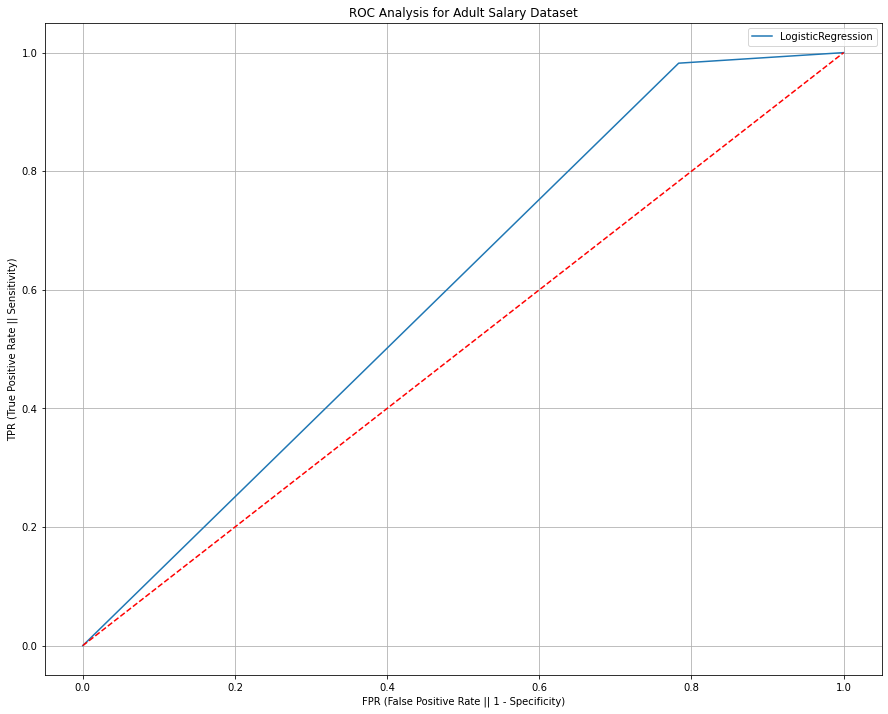

In [534]:
LR=LogisticRegression(random_state=10)
bulid_model('Logistic Regression',LR,X_train_final,y_train,X_test_final,y_test)

## Voting Classifier-Soft

Performance of the model on Training Data:

Confusion matrix:

[[15483   179]
 [    8 58540]]

Classification report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15662
           1       1.00      1.00      1.00     58548

    accuracy                           1.00     74210
   macro avg       1.00      0.99      1.00     74210
weighted avg       1.00      1.00      1.00     74210


Performance of the model on testing Data:

Confusion matrix:

[[ 1475  3746]
 [  931 18585]]

Classification report:

              precision    recall  f1-score   support

           0       0.61      0.28      0.39      5221
           1       0.83      0.95      0.89     19516

    accuracy                           0.81     24737
   macro avg       0.72      0.62      0.64     24737
weighted avg       0.79      0.81      0.78     24737


Training Accuracy: 0.9974801239725104
Testing Accuracy: 0.8109309940574847

ROC AUC graph:


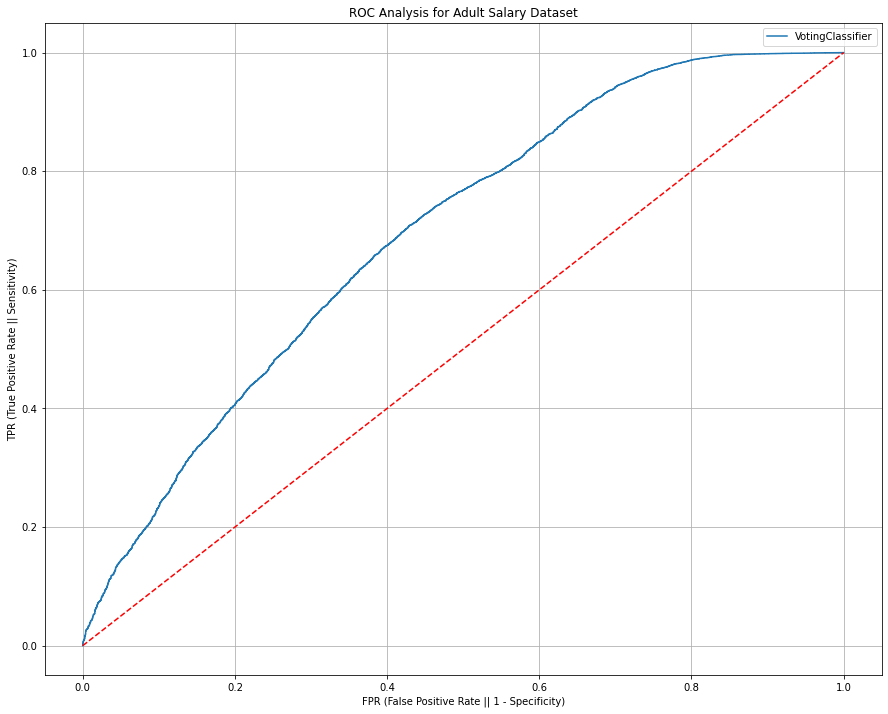

In [350]:
vs=vote_soft
bulid_model('votingsoft',vs,X_train_final,y_train,X_test_final,y_test)

## Voting Classifier-hard

In [ ]:
base_estimators = [('Decison tree', DecisionTreeClassifier()), 
                  ('Random Forest', RandomForestClassifier()), 
                  ('Log Reg', LogisticRegression()), 
                  ('Bagging classifier', BaggingClassifier())]

In [ ]:
vc=VotingClassifier(estimators=base_estimators,voting='soft')
vc_model=vc.fit(X_train_final,y_train)

In [ ]:
y_pred=vc_model.predict(X_test_final)

In [ ]:
y_pred1=vc_model.predict_proba(X_test_final)[:,1]

In [ ]:
roc_auc_score(y_test,y_pred)

In [ ]:
roc_auc_score(y_test,y_pred1)

Performance of the model on Training Data:

Confusion matrix:

[[15481   181]
 [    6 58542]]

Classification report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15662
           1       1.00      1.00      1.00     58548

    accuracy                           1.00     74210
   macro avg       1.00      0.99      1.00     74210
weighted avg       1.00      1.00      1.00     74210


Performance of the model on testing Data:

Confusion matrix:

[[ 1472  3749]
 [  925 18591]]

Classification report:

              precision    recall  f1-score   support

           0       0.61      0.28      0.39      5221
           1       0.83      0.95      0.89     19516

    accuracy                           0.81     24737
   macro avg       0.72      0.62      0.64     24737
weighted avg       0.79      0.81      0.78     24737


Training Accuracy: 0.9974801239725104
Testing Accuracy: 0.8110522698791285

ROC AUC graph:


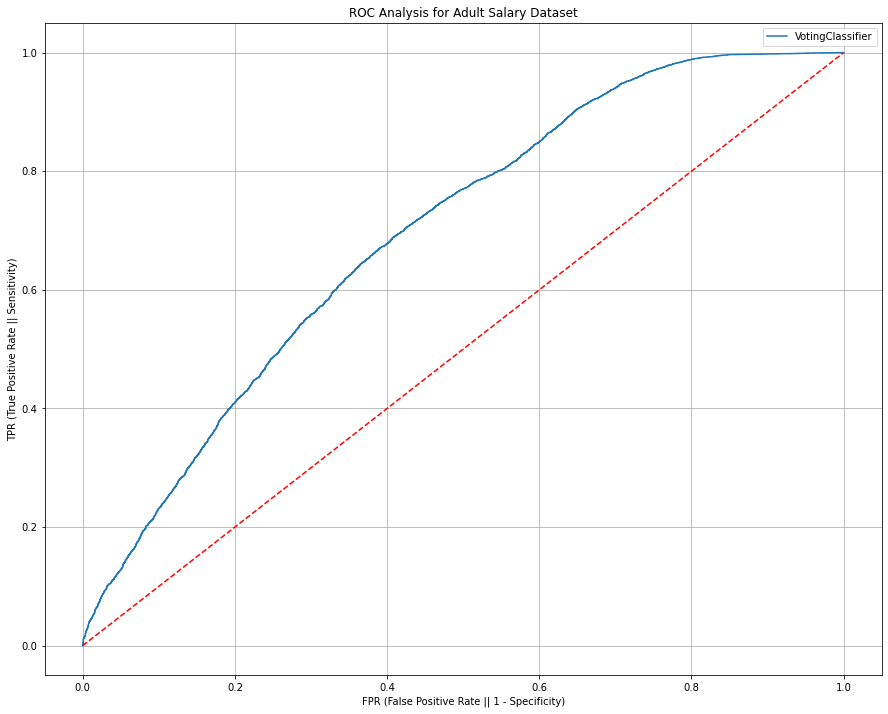

In [351]:
vd=vote_hard
bulid_model('votinghard',vs,X_train_final,y_train,X_test_final,y_test)

## XGBClassifier

In [421]:
!pip install xgboost

[17:24:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Performance of the model on Training Data:

Confusion matrix:

[[ 4460 11202]
 [  568 57980]]

Classification report:

              precision    recall  f1-score   support

           0       0.89      0.28      0.43     15662
           1       0.84      0.99      0.91     58548

    accuracy                           0.84     74210
   macro avg       0.86      0.64      0.67     74210
weighted avg       0.85      0.84      0.81     74210


Performance of the model on testing Data:

Confusion matrix:

[[ 1194  4027]
 [  387 19129]]

Classification report:

              precision    recall  f1-score   support

           0       0.76      0.23      0.35      5221
           1    

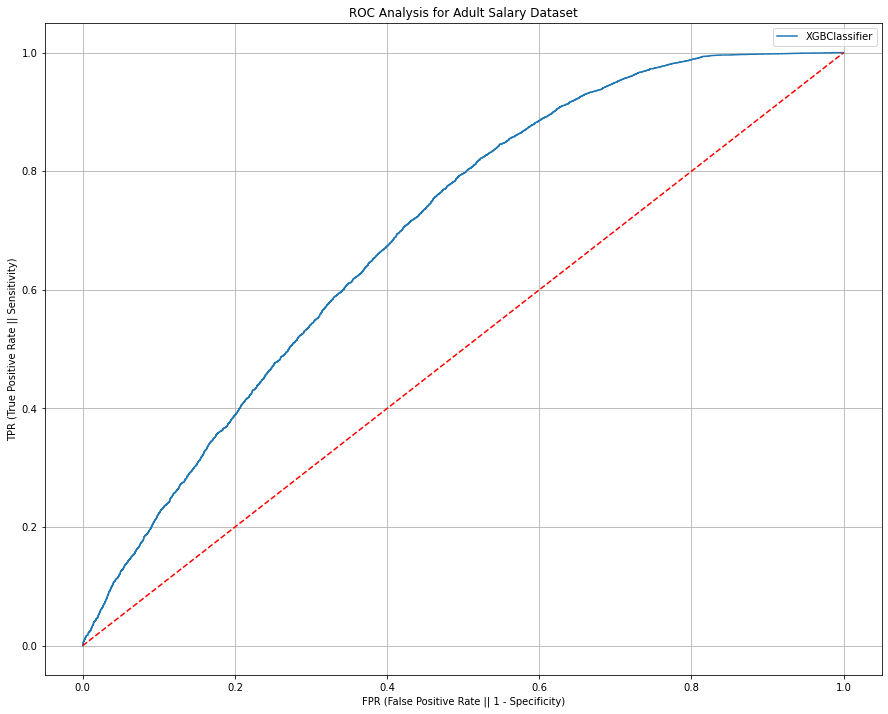

In [346]:
xgb=XGBClassifier()
bulid_model("XGBclassifier",xgb, X_train_final, y_train, X_test_final, y_test)

## BaggingClassifier

In [109]:
from sklearn.ensemble import BaggingClassifier

Performance of the model on Training Data:

Confusion matrix:

[[15039   623]
 [  285 58263]]

Classification report:

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     15662
           1       0.99      1.00      0.99     58548

    accuracy                           0.99     74210
   macro avg       0.99      0.98      0.98     74210
weighted avg       0.99      0.99      0.99     74210


Performance of the model on testing Data:

Confusion matrix:

[[ 1731  3490]
 [ 1674 17842]]

Classification report:

              precision    recall  f1-score   support

           0       0.51      0.33      0.40      5221
           1       0.84      0.91      0.87     19516

    accuracy                           0.79     24737
   macro avg       0.67      0.62      0.64     24737
weighted avg       0.77      0.79      0.77     24737


Training Accuracy: 0.9877644522301576
Testing Accuracy: 0.7912438856773255

ROC AUC graph:


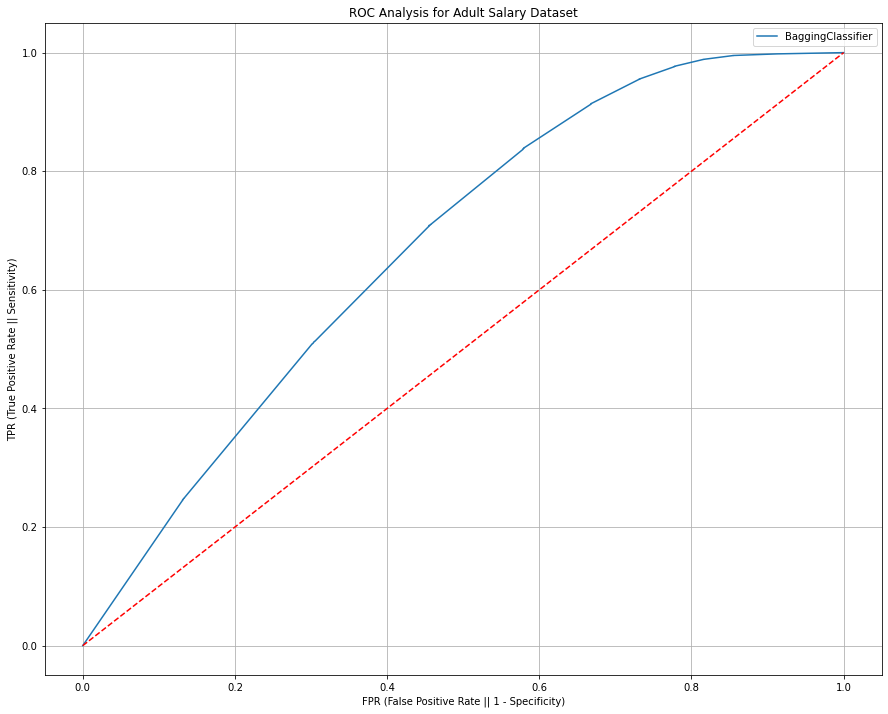

In [347]:
BC=BaggingClassifier()
bulid_model("BaggingClassifier",BC, X_train_final, y_train, X_test_final, y_test)

In [353]:
scorecard

,Model,tn,fp,fn,tp,Precision,Recall,F1_score,AUC,Train_Accuracy,Test_Accuracy,Kappa_score
0,RandomForest,1364,3857,559,18957,0.830937,0.971357,0.895677,0.707949,0.997561,0.821482,0.302619
1,DecisionTreeClassifier,1966,3255,3550,15966,0.830654,0.818098,0.824328,0.597748,0.997588,0.724906,0.190708
2,AdaBoostClassifier,1079,4142,286,19230,0.822779,0.985345,0.896754,0.683174,0.822800,0.820997,0.263204
3,KNeighborsClassifier,1369,3852,1036,18480,0.827512,0.946915,0.883196,0.649461,0.845762,0.802401,0.260604
4,GradientBoostingClassifier,1102,4119,282,19234,0.823620,0.985550,0.897338,0.695125,0.825037,0.822088,0.269032
5,XGBclassifier,1194,4027,387,19129,0.826093,0.980170,0.896560,0.697137,0.841396,0.821563,0.280478
6,BaggingClassifier,1731,3490,1674,17842,0.836396,0.914224,0.873580,0.672434,0.987764,0.791244,0.281648
7,votingsoft,1475,3746,931,18585,0.832251,0.952296,0.888236,0.694021,0.997480,0.810931,0.292583
8,votinghard,1472,3749,925,18591,0.832184,0.952603,0.888331,0.695040,0.997480,0.811052,0.292480


## Model Tuning

### Tuned Random Forest 

In [416]:
params=[{'n_estimators':[90,120,150],
        'criterion': ['gini','entropy'],
        'min_samples_split':[2,4,6],
        'max_depth':[2,4,6,8,10]}]

kf=KFold(n_splits=3)
rf_grid=GridSearchCV(estimator=RandomForestClassifier(random_state=10),param_grid=params,cv=kf,scoring='f1')
rf_grid_model=rf_grid.fit(X_train_final,y_train)
rf_grid_model.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_split': 4,
 'n_estimators': 90}

### Tuned Decision Tree

In [115]:
params = {'criterion':['gini','entropy'],
                  'max_depth':[2,3,5,6],
                  'min_samples_split':[2,3,4,5],
                  'min_samples_leaf':[1,3,5],
                  'max_leaf_nodes':[2,3,4],
                  'max_features':['auto','sqrt','log2']}
kf=KFold(n_splits=5)
dt_grid=GridSearchCV(estimator=DecisionTreeClassifier(random_state=10),param_grid=params,cv=kf,scoring='roc_auc')
dt_grid_model=dt_grid.fit(X_train_final,y_train)
dt_grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

### Tuned AdaBoost Classifier

In [107]:
Ada = AdaBoostClassifier(random_state=42)

hyp_parameters = {'base_estimator':[RandomForestClassifier(),DecisionTreeClassifier()],'n_estimators':[30,50,80],
                 'learning_rate':[0.5,1]}

kf = KFold(n_splits=3,shuffle=True,random_state=10)

grid_Ada = GridSearchCV(estimator=Ada,param_grid=hyp_parameters,cv=kf,scoring='roc_auc')

grid_Ada.fit(X_train_final,y_train)
grid_Ada.best_params_

{'base_estimator': RandomForestClassifier(),
 'learning_rate': 0.5,
 'n_estimators': 30}

### Tuned Gradient Boosting Classifier

In [105]:
hyper_params = [{'n_estimators' : [50,100],
    'max_depth' : [4,6,8],
    'min_samples_split' : [5,10,15]}]
kf=KFold(n_splits=3,shuffle=True,random_state=0)
gd = GradientBoostingClassifier(random_state=53)
gd_grid = GridSearchCV(estimator = gd, param_grid = hyper_params, cv = kf, scoring='roc_auc')
gd_grid = gd_grid.fit(X_train_final, y_train)
print('Optimal number of trees for GradientBoostingClassifier: ', gd_grid.best_params_, '\n')

Optimal number of trees for random forest Classifier:  {'max_depth': 6, 'min_samples_split': 10, 'n_estimators': 100} 



In [106]:
print('Optimal number of GradientBoostingClassifier ', gd_grid.best_params_, '\n')

Optimal number of GradientBoostingClassifier  {'max_depth': 6, 'min_samples_split': 10, 'n_estimators': 100} 



## Scorecard for all the models

## Tuned Decision Tree

In [358]:
Tuned_DT = DecisionTreeClassifier(criterion='entropy', 
                                 max_depth=2, 
                                 max_features='auto', 
                                 max_leaf_nodes=4, 
                                 min_samples_leaf=1, 
                                 min_samples_split=2, 
                                 random_state = 42)

Performance of the model on Training Data:

Confusion matrix:

[[    0 15662]
 [    0 58548]]

Classification report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     15662
           1       0.79      1.00      0.88     58548

    accuracy                           0.79     74210
   macro avg       0.39      0.50      0.44     74210
weighted avg       0.62      0.79      0.70     74210


Performance of the model on testing Data:

Confusion matrix:

[[    0  5221]
 [    0 19516]]

Classification report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5221
           1       0.79      1.00      0.88     19516

    accuracy                           0.79     24737
   macro avg       0.39      0.50      0.44     24737
weighted avg       0.62      0.79      0.70     24737


Training Accuracy: 0.7889502762430939
Testing Accuracy: 0.7889396450660954

ROC AUC graph:


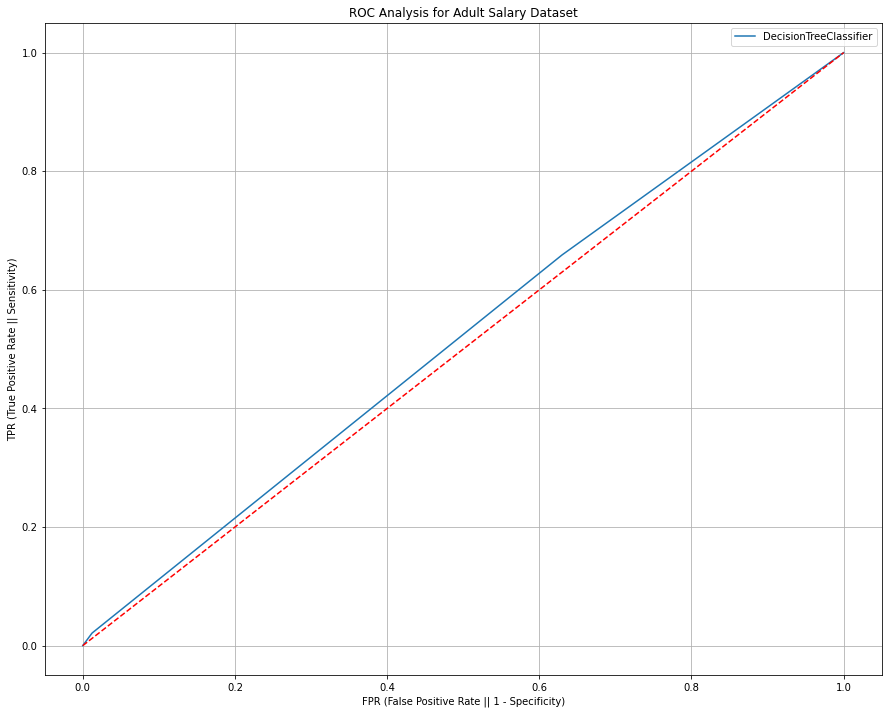

In [360]:
bulid_model("Tuned_DecisionTree",Tuned_DT, X_train_final, y_train, X_test_final, y_test)

## Tuned_Random_forest

In [362]:
Tuned_Random_forest = RandomForestClassifier(n_estimators = 90, 
    criterion = 'gini', 
    max_depth = 10, 
    min_samples_split = 4, 
    min_samples_leaf = 1,                                        
    random_state = 42,  
    n_jobs = -1)

Performance of the model on Training Data:

Confusion matrix:

[[ 3421 12241]
 [  470 58078]]

Classification report:

              precision    recall  f1-score   support

           0       0.88      0.22      0.35     15662
           1       0.83      0.99      0.90     58548

    accuracy                           0.83     74210
   macro avg       0.85      0.61      0.63     74210
weighted avg       0.84      0.83      0.78     74210


Performance of the model on testing Data:

Confusion matrix:

[[ 1054  4167]
 [  229 19287]]

Classification report:

              precision    recall  f1-score   support

           0       0.82      0.20      0.32      5221
           1       0.82      0.99      0.90     19516

    accuracy                           0.82     24737
   macro avg       0.82      0.60      0.61     24737
weighted avg       0.82      0.82      0.78     24737


Training Accuracy: 0.8287158064950815
Testing Accuracy: 0.8222904960181106

ROC AUC graph:


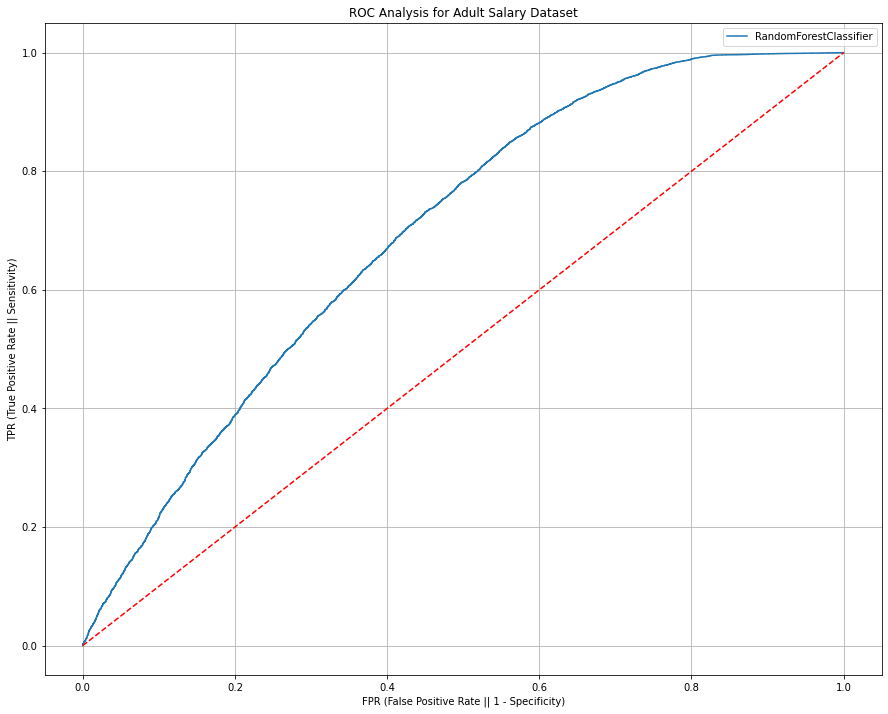

In [365]:
bulid_model("Tuned_Random_forest",Tuned_Random_forest, X_train_final, y_train, X_test_final, y_test)

## Tuned_AdaBoost

In [366]:
Tuned_AdaBoost = AdaBoostClassifier(base_estimator = RandomForestClassifier(), 
                                    learning_rate = 0.5, 
                                    n_estimators = 30, 
                                   random_state = 42)

Performance of the model on Training Data:

Confusion matrix:

[[15500   162]
 [   17 58531]]

Classification report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15662
           1       1.00      1.00      1.00     58548

    accuracy                           1.00     74210
   macro avg       1.00      0.99      1.00     74210
weighted avg       1.00      1.00      1.00     74210


Performance of the model on testing Data:

Confusion matrix:

[[ 1245  3976]
 [  426 19090]]

Classification report:

              precision    recall  f1-score   support

           0       0.75      0.24      0.36      5221
           1       0.83      0.98      0.90     19516

    accuracy                           0.82     24737
   macro avg       0.79      0.61      0.63     24737
weighted avg       0.81      0.82      0.78     24737


Training Accuracy: 0.9975879261555046
Testing Accuracy: 0.8220479443748231

ROC AUC graph:


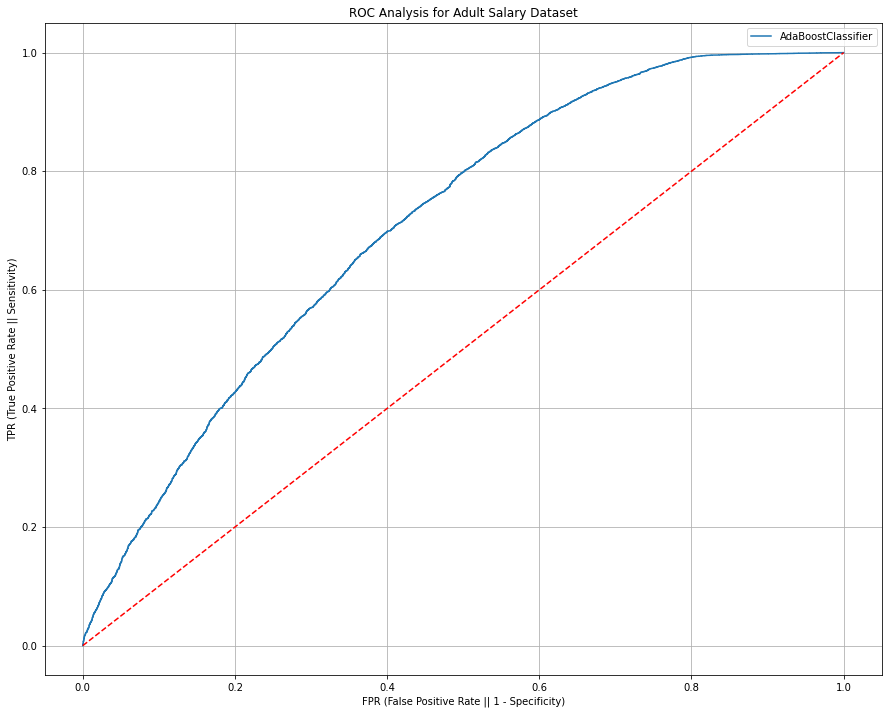

In [367]:
bulid_model("Tuned_AdaBoost",Tuned_AdaBoost, X_train_final, y_train, X_test_final, y_test)

## Tuned_GradientBoostingClassifier

In [394]:
GB=GradientBoostingClassifier()
gb_model=GB.fit(X_train_final,y_train)

In [398]:
gb_model.estimators_

array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x23468658440)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x23468658440)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x23468658440)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x23468658440)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x23468658440)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x23468658440)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
             

In [401]:
tuned_gb = GradientBoostingClassifier(n_estimators=100,
                                     min_samples_split=10, 
                                     max_depth=3, 
                                     random_state=53)

Performance of the model on Training Data:

Confusion matrix:

[[ 3431 12231]
 [  761 57787]]

Classification report:

              precision    recall  f1-score   support

           0       0.82      0.22      0.35     15662
           1       0.83      0.99      0.90     58548

    accuracy                           0.82     74210
   macro avg       0.82      0.60      0.62     74210
weighted avg       0.82      0.82      0.78     74210


Performance of the model on testing Data:

Confusion matrix:

[[ 1097  4124]
 [  284 19232]]

Classification report:

              precision    recall  f1-score   support

           0       0.79      0.21      0.33      5221
           1       0.82      0.99      0.90     19516

    accuracy                           0.82     24737
   macro avg       0.81      0.60      0.61     24737
weighted avg       0.82      0.82      0.78     24737


Training Accuracy: 0.8249292548174101
Testing Accuracy: 0.8218053927315357

ROC AUC graph:


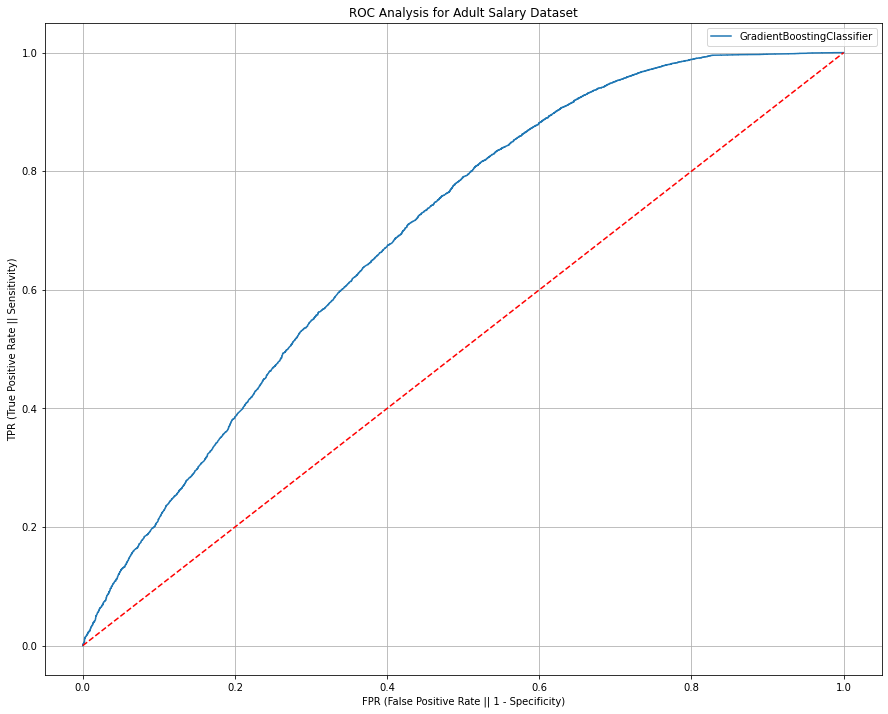

In [402]:
bulid_model("tuned_gb ",tuned_gb , X_train_final, y_train, X_test_final, y_test)

In [374]:
hyper_params = [{'learning_rate': [0.6, 0.8], 'max_depth': [5,6], 'gamma': [1, 2]}]
kf=KFold(n_splits=3,shuffle=True,random_state=0)
xgb = XGBClassifier(random_state = 10)
xgb_grid = GridSearchCV(estimator = xgb, param_grid = hyper_params, cv = kf, scoring='accuracy')
xgb_grid = xgb_grid.fit(X_train_final, y_train)

[19:57:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:57:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:57:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:57:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [393]:
scorecard

,Model,tn,fp,fn,tp,Precision,Recall,F1_score,AUC,Train_Accuracy,Test_Accuracy,Kappa_score
0,RandomForest,1364,3857,559,18957,0.830937,0.971357,0.895677,0.707949,0.997561,0.821482,0.302619
1,DecisionTreeClassifier,1966,3255,3550,15966,0.830654,0.818098,0.824328,0.597748,0.997588,0.724906,0.190708
2,AdaBoostClassifier,1079,4142,286,19230,0.822779,0.985345,0.896754,0.683174,0.822800,0.820997,0.263204
3,KNeighborsClassifier,1369,3852,1036,18480,0.827512,0.946915,0.883196,0.649461,0.845762,0.802401,0.260604
4,GradientBoostingClassifier,1102,4119,282,19234,0.823620,0.985550,0.897338,0.695125,0.825037,0.822088,0.269032
5,XGBclassifier,1194,4027,387,19129,0.826093,0.980170,0.896560,0.697137,0.841396,0.821563,0.280478
6,BaggingClassifier,1731,3490,1674,17842,0.836396,0.914224,0.873580,0.672434,0.987764,0.791244,0.281648
7,votingsoft,1475,3746,931,18585,0.832251,0.952296,0.888236,0.694021,0.997480,0.810931,0.292583
8,votinghard,1472,3749,925,18591,0.832184,0.952603,0.888331,0.695040,0.997480,0.811052,0.292480
9,Tuned_DecisionTree,0,5221,0,19516,0.788940,1.000000,0.882019,0.517117,0.788950,0.788940,0.000000


In [375]:
xgb_grid.best_params_

{'gamma': 2, 'learning_rate': 0.6, 'max_depth': 5}

In [376]:
tuned_xgb = XGBClassifier(max_depth = 5, 
             learning_rate = 0.6, 
             gamma = 2, 
             random_state = 42)

[20:00:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Performance of the model on Training Data:

Confusion matrix:

[[ 4816 10846]
 [  753 57795]]

Classification report:

              precision    recall  f1-score   support

           0       0.86      0.31      0.45     15662
           1       0.84      0.99      0.91     58548

    accuracy                           0.84     74210
   macro avg       0.85      0.65      0.68     74210
weighted avg       0.85      0.84      0.81     74210


Performance of the model on testing Data:

Confusion matrix:

[[ 1253  3968]
 [  520 18996]]

Classification report:

              precision    recall  f1-score   support

           0       0.71      0.24      0.36      5221
           1    

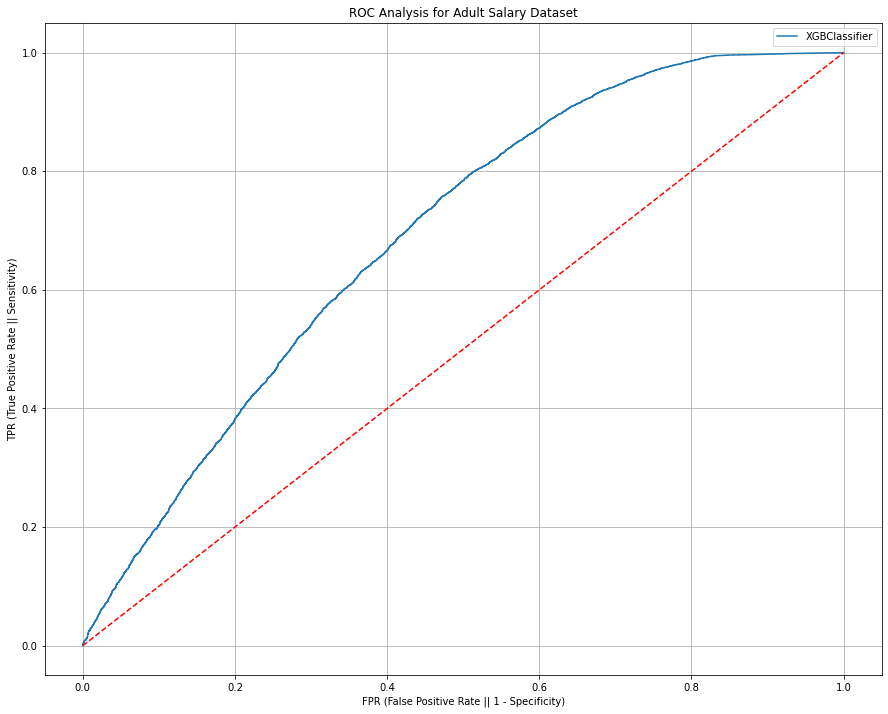

In [377]:
bulid_model("tuned_xgb ",tuned_xgb , X_train_final, y_train, X_test_final, y_test)

In [378]:
scorecard

,Model,tn,fp,fn,tp,Precision,Recall,F1_score,AUC,Train_Accuracy,Test_Accuracy,Kappa_score
0,RandomForest,1364,3857,559,18957,0.830937,0.971357,0.895677,0.707949,0.997561,0.821482,0.302619
1,DecisionTreeClassifier,1966,3255,3550,15966,0.830654,0.818098,0.824328,0.597748,0.997588,0.724906,0.190708
2,AdaBoostClassifier,1079,4142,286,19230,0.822779,0.985345,0.896754,0.683174,0.822800,0.820997,0.263204
3,KNeighborsClassifier,1369,3852,1036,18480,0.827512,0.946915,0.883196,0.649461,0.845762,0.802401,0.260604
4,GradientBoostingClassifier,1102,4119,282,19234,0.823620,0.985550,0.897338,0.695125,0.825037,0.822088,0.269032
5,XGBclassifier,1194,4027,387,19129,0.826093,0.980170,0.896560,0.697137,0.841396,0.821563,0.280478
6,BaggingClassifier,1731,3490,1674,17842,0.836396,0.914224,0.873580,0.672434,0.987764,0.791244,0.281648
7,votingsoft,1475,3746,931,18585,0.832251,0.952296,0.888236,0.694021,0.997480,0.810931,0.292583
8,votinghard,1472,3749,925,18591,0.832184,0.952603,0.888331,0.695040,0.997480,0.811052,0.292480
9,Tuned_DecisionTree,0,5221,0,19516,0.788940,1.000000,0.882019,0.517117,0.788950,0.788940,0.000000


In [381]:
scorecard = scorecard.drop(10)

In [383]:
scorecard.reset_index(drop = True, inplace = True)

In [384]:
scorecard

,Model,tn,fp,fn,tp,Precision,Recall,F1_score,AUC,Train_Accuracy,Test_Accuracy,Kappa_score
0,RandomForest,1364,3857,559,18957,0.830937,0.971357,0.895677,0.707949,0.997561,0.821482,0.302619
1,DecisionTreeClassifier,1966,3255,3550,15966,0.830654,0.818098,0.824328,0.597748,0.997588,0.724906,0.190708
2,AdaBoostClassifier,1079,4142,286,19230,0.822779,0.985345,0.896754,0.683174,0.822800,0.820997,0.263204
3,KNeighborsClassifier,1369,3852,1036,18480,0.827512,0.946915,0.883196,0.649461,0.845762,0.802401,0.260604
4,GradientBoostingClassifier,1102,4119,282,19234,0.823620,0.985550,0.897338,0.695125,0.825037,0.822088,0.269032
5,XGBclassifier,1194,4027,387,19129,0.826093,0.980170,0.896560,0.697137,0.841396,0.821563,0.280478
6,BaggingClassifier,1731,3490,1674,17842,0.836396,0.914224,0.873580,0.672434,0.987764,0.791244,0.281648
7,votingsoft,1475,3746,931,18585,0.832251,0.952296,0.888236,0.694021,0.997480,0.810931,0.292583
8,votinghard,1472,3749,925,18591,0.832184,0.952603,0.888331,0.695040,0.997480,0.811052,0.292480
9,Tuned_DecisionTree,0,5221,0,19516,0.788940,1.000000,0.882019,0.517117,0.788950,0.788940,0.000000


### Best Model: GradientBoostingClassifier	

In [387]:
models_tuned = []
models_tuned.append(('Tuned Decision Tree', Tuned_DT))
models_tuned.append(('Tuned Random Forest',Tuned_Random_forest))
models_tuned.append(('Tuned Adaboost Classifier',Tuned_AdaBoost))
models_tuned.append(('Tuned XGBClassifier',tuned_xgb))
models_tuned.append(('Tuned gradientboosting',tuned_gb))

In [390]:
results = []
names = []
for name, model in models_tuned:
    kfold = KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results = cross_val_score(model, X_train_final, y_train, cv=kfold, scoring='f1_weighted')
    results.append(cv_results)
    names.append(name)
    print("%s: Bias error: (%f) Variance error: (%f)" % (name, 1-np.mean(cv_results),np.std(cv_results,ddof=1)))

Tuned Decision Tree: Bias error: (0.304125) Variance error: (0.001920)
Tuned Random Forest: Bias error: (0.221665) Variance error: (0.000706)
Tuned Adaboost Classifier: Bias error: (0.215751) Variance error: (0.001345)
[22:27:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:27:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:27:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric us

In [ ]:
# Tuned Decision Tree: Bias error: (0.304125) Variance error: (0.001920)
# Tuned Random Forest: Bias error: (0.221665) Variance error: (0.000706)
# Tuned Adaboost Classifier: Bias error: (0.215751) Variance error: (0.001345)
# Tuned XGBClassifier: Bias error: (0.216993) Variance error: (0.000519)
# Tuned gradientboosting: Bias error: (0.218216) Variance error: (0.000788)